Given how it is apparently possible to skew a model's training towards getting a perfect accuracy, some discussion on Kaggle hinted that this was rampant on this Leaderboard. As such, a decision was made not to submit, but rather to utilize this interesting dataset to explore and learn more about machine learning.

More on this topic can be read here on this submission: https://www.kaggle.com/tarunpaparaju/how-top-lb-got-their-score-use-titanic-to-learn

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
train_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [73]:
train_data = pd.DataFrame.drop(train_data, columns='Cabin')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [74]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [75]:
train_data.corr(method='pearson')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Age only has a Pearson's r score of -0.077 with Survived; this implies a very negative relationship with whether the passenger suvived. Given that about 180 of the 890 passengers, or ~20% of the passengers, have no reported age, it was decided that the Age column will be dropped too. 

In [76]:
train_data = pd.DataFrame.drop(train_data, columns='Age')

Embarked has only a Pearson's r of 0.08 with Survived, meaning that where the passenger Embarked from only has a weak positive relationship with their survival outcome. As there are 2 variables missing, it was decided that Embarked shall be dropped as well.

In [77]:
train_data = pd.DataFrame.drop(train_data, columns='Embarked')

In [78]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500


In [79]:
train_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
SibSp          891
Parch          891
Ticket         891
Fare           891
dtype: int64

Converting Sex to numerical categorical data, where Female = 0 and Male = 1

In [80]:
df = train_data
df_cat = df
df_cat.loc[df['Sex'] == 'female', 'Sex'] = 0
df_cat.loc[df['Sex'] == 'male', 'Sex'] = 1

In [81]:
train_data = df
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500


In [82]:
train_data.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [83]:
train_data.Ticket.value_counts()

1601                 7
347082               7
CA. 2343             7
3101295              6
CA 2144              6
                    ..
14311                1
SC/Paris 2163        1
SOTON/O.Q. 392078    1
C.A./SOTON 34068     1
392092               1
Name: Ticket, Length: 681, dtype: int64

In [84]:
train_data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

There are literally hundreds of Ticket and Fare types. However, there are only 3 Passenger Class types. It should be safe to assume that despite the different Ticket type and Fare amounts, these Tickets and Fares would lead to passengers ending up in only 3 different Classes. As such, the Tickets and Fares will be dropped as well.

In [85]:
train_data = pd.DataFrame.drop(train_data, columns='Fare')

In [86]:
train_data = pd.DataFrame.drop(train_data, columns='Ticket')

Given that passenger names should not affect whether or not they survive, the Name column shall be dropped too.

In [87]:
train_data = pd.DataFrame.drop(train_data, columns='Name')

In [88]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch
0,1,0,3,1,1,0
1,2,1,1,0,1,0
2,3,1,3,0,0,0
3,4,1,1,0,1,0
4,5,0,3,1,0,0


In [89]:
train_data.count()

PassengerId    891
Survived       891
Pclass         891
Sex            891
SibSp          891
Parch          891
dtype: int64

### Splitting Data into X and y for Training

In [90]:
#Note: PassengerId not needed either
X_train = train_data[['Pclass', 'Sex', 'SibSp', 'Parch']]
X_train.head()

,Pclass,Sex,SibSp,Parch
0,3,1,1,0
1,1,0,1,0
2,3,0,0,0
3,1,0,1,0
4,3,1,0,0


In [91]:
X_train.count()

Pclass    891
Sex       891
SibSp     891
Parch     891
dtype: int64

In [92]:
y_train = train_data['Survived']
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [93]:
y_train.count()

891

## Preparing Test Data

Through online research, the overall dataset with the Test data answers included was obtained. However, the Test answers must now be added to the Test set. (Link: https://storage.googleapis.com/kaggle-forum-message-attachments/66979/2180/titanic.csv)

In [94]:
answers_set = pd.read_csv('titanic_answers.csv')

In [95]:
answers_set.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [96]:
answers_set.count()

pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

In [97]:
test_data = pd.read_csv('test.csv')

In [98]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [99]:
test_data.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

The rows in answer_set that matter are the ones where the Name appear in test_data.

In [100]:
answers_filtered = answers_set[answers_set.name.isin(test_data.Name)]

In [101]:
answers_filtered.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
10,1,0,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.5250,C62 C64,C,NaN,124.0,"New York, NY"
19,1,0,"Beattie, Mr. Thomson",male,36.0,0,0,13050,75.2417,C6,C,A,NaN,"Winnipeg, MN"
24,1,1,"Bird, Miss. Ellen",female,29.0,0,0,PC 17483,221.7792,C97,S,8,NaN,NaN
25,1,0,"Birnbaum, Mr. Jakob",male,25.0,0,0,13905,26.0000,NaN,C,NaN,148.0,"San Francisco, CA"


In [102]:
answers_filtered.count()

pclass       398
survived     398
name         398
sex          398
age          320
sibsp        398
parch        398
ticket       398
fare         397
cabin         90
embarked     398
boat         145
body          36
home.dest    237
dtype: int64

It was decided that an approximate 5% loss of test data was acceptable.

Next, cleaning up the test data, to a similar format as the training data:

In [103]:
answers_filtered = pd.DataFrame.drop(answers_filtered, columns='name')
answers_filtered = pd.DataFrame.drop(answers_filtered, columns='age')
answers_filtered = pd.DataFrame.drop(answers_filtered, columns='ticket')
answers_filtered = pd.DataFrame.drop(answers_filtered, columns='fare')
answers_filtered = pd.DataFrame.drop(answers_filtered, columns='cabin')
answers_filtered = pd.DataFrame.drop(answers_filtered, columns='embarked')
answers_filtered = pd.DataFrame.drop(answers_filtered, columns='boat')
answers_filtered = pd.DataFrame.drop(answers_filtered, columns='body')
answers_filtered = pd.DataFrame.drop(answers_filtered, columns='home.dest')

In [104]:
answers_filtered.count()

pclass      398
survived    398
sex         398
sibsp       398
parch       398
dtype: int64

In [105]:
answers_filtered.head()

,pclass,survived,sex,sibsp,parch
3,1,0,male,1,2
10,1,0,male,1,0
19,1,0,male,0,0
24,1,1,female,0,0
25,1,0,male,0,0


Convert Sex to numerical categorical data

In [106]:
df = answers_filtered
df_cat = df
df_cat.loc[df['sex'] == 'female', 'sex'] = 0
df_cat.loc[df['sex'] == 'male', 'sex'] = 1

In [107]:
answers_filtered = df
answers_filtered.head()

,pclass,survived,sex,sibsp,parch
3,1,0,1,1,2
10,1,0,1,1,0
19,1,0,1,0,0
24,1,1,0,0,0
25,1,0,1,0,0


### Splitting Data into X and y for Testing

In [108]:
X_test = answers_filtered[['pclass', 'sex', 'sibsp', 'parch']]
X_test.head()

,pclass,sex,sibsp,parch
3,1,1,1,2
10,1,1,1,0
19,1,1,0,0
24,1,0,0,0
25,1,1,0,0


In [109]:
X_test.count()

pclass    398
sex       398
sibsp     398
parch     398
dtype: int64

In [110]:
y_test = answers_filtered['survived']
y_test.head()

3     0
10    0
19    0
24    1
25    0
Name: survived, dtype: int64

In [111]:
y_test.count()

398

In [112]:
y_train.count() / X_test.count()

pclass    2.238693
sex       2.238693
sibsp     2.238693
parch     2.238693
dtype: float64

The training data sample size is about 2.23 times that of the test data. In other words:

In [113]:
X_test.count() / (y_train.count() + X_test.count())

pclass    0.308766
sex       0.308766
sibsp     0.308766
parch     0.308766
dtype: float64

this means it is the approximate equivalent of train_test_split = 0.3

## Training Models

### Logistic Regression

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [115]:
logReg = LogisticRegression(solver = 'lbfgs', multi_class='multinomial', max_iter=300)
logReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [116]:
y_pred = logReg.predict(X_test)
accuracy_score(y_test, y_pred)

0.7738693467336684

The Logistic Regression model was only 77.39% accurate. Other models shall be explored in order to create a more accurate model.

### KNN

As this is a classification problem to be solved, a KNN model would be suitable, and hence possibly yield a model with high accuracy.

In [117]:
import sklearn
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [118]:
knn_model = KNeighborsClassifier(n_neighbors = 3) 

knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [119]:
y_pred = knn_model.predict(X_test)

In [120]:
accuracy_score(y_test, y_pred)

0.7537688442211056

Finding the best-performing number of n_neighbors

In [121]:
i = 0
iBest = 0
accuracyBest = 0.00
for i in range (1,203, i+2):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > accuracyBest:
        accuracyBest = accuracy
        iBest = i
    print("i = {0} | Accuracy: {1}".format(i, accuracy))

print("\niBest = {0} | accuracyBest = {1}".format(iBest, accuracyBest))

i = 1 | Accuracy: 0.7412060301507538
i = 3 | Accuracy: 0.7537688442211056
i = 5 | Accuracy: 0.7562814070351759
i = 7 | Accuracy: 0.7713567839195979
i = 9 | Accuracy: 0.7613065326633166
i = 11 | Accuracy: 0.7638190954773869
i = 13 | Accuracy: 0.7713567839195979
i = 15 | Accuracy: 0.7638190954773869
i = 17 | Accuracy: 0.7688442211055276
i = 19 | Accuracy: 0.7638190954773869
i = 21 | Accuracy: 0.7713567839195979
i = 23 | Accuracy: 0.7713567839195979
i = 25 | Accuracy: 0.7638190954773869
i = 27 | Accuracy: 0.7663316582914573
i = 29 | Accuracy: 0.7663316582914573
i = 31 | Accuracy: 0.7663316582914573
i = 33 | Accuracy: 0.7613065326633166
i = 35 | Accuracy: 0.7663316582914573
i = 37 | Accuracy: 0.7638190954773869
i = 39 | Accuracy: 0.7638190954773869
i = 41 | Accuracy: 0.7613065326633166
i = 43 | Accuracy: 0.7663316582914573
i = 45 | Accuracy: 0.7613065326633166
i = 47 | Accuracy: 0.7638190954773869
i = 49 | Accuracy: 0.7537688442211056
i = 51 | Accuracy: 0.7537688442211056
i = 53 | Accuracy

The best-performing number of n_neighbors is 7, with the best accuracy at 77.14%.

As this was not a significantly more accurate model in comparison to Logistic Regression, the search shall continue for a more accurate model.

### K-Means Clustering

In [122]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

In [123]:
km_model = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

km_model.fit(X_train)
y_kmeans = km_model.fit_predict(X_train)

In [124]:
accuracy = km_model.predict(X_test)
accuracy

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [125]:
y_test

3       0
10      0
19      0
24      1
25      0
       ..
1290    1
1296    0
1298    0
1306    0
1307    0
Name: survived, Length: 398, dtype: int64

**Seems like it doesn't work; need to come back to this at another time...

### Building an ANN for Classification

In [126]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.metrics import confusion_matrix, accuracy_score
from timeit import default_timer as timer
import keras.models
from keras.models import model_from_json

Using TensorFlow backend.


Choice of Neural Network design (after some experimentation):

- 4 layers of relu
- as input_dim = 4, no. of units = 4*4 = 16
- Output layer with Sigmoid activation for binary classification
- Adam Optimizer

In [136]:
class ANN_class:
    def __init__(self, X_train, y_train, X_test, y_test):
        self.test_size = 0.0
        self.random_state = 0
        self.accuracy = 0.00
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.y_pred = []
        self.model = Sequential()
    
    def make_model(self):
        # Adding the input layer and the first hidden layer
        self.model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))    
        # Adding the second hidden layer
        self.model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))    
        # Adding the third hidden layer
        self.model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
        # Adding the fourth hidden layer
        self.model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
        # Adding the output layer
        self.model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))    
        # Compiling the ANN
        self.model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
        return self.model

    def train_model(self, i, j):
        self.model.fit(self.X_train, self.y_train, batch_size = i, epochs = j)
        return self.model

    def get_y_pred(self):
        self.y_pred = self.model.predict(self.X_test)
        return self.y_pred
  
    def get_accuracy(self):
        self.accuracy = accuracy_score(self.y_test, self.y_pred.round()) #Round had to be used as last layer is sigmoid (ValueError: Classification metrics can't handle a mix of binary and continuous targets)
        return self.accuracy
  
    def everything(self, i, j):
        self.make_model()
        self.train_model(i, j)
        self.get_y_pred()
        self.get_accuracy()

Loop to find good-performing batch sizes and epochs

In [137]:
i_Best = 0
j_Best = 0
accuracy_Best = 0.00

In [140]:
start = timer()


for i in range(10, 30, 10):
    for j in range(50, 650, 50):
        ANN_model = ANN_class(X_train, y_train, X_test, y_test)
        ANN_model.everything(i, j)
        if ANN_model.accuracy > accuracyBest:
            i_Best = i
            j_Best = j
            accuracy_Best = ANN_model.accuracy
        print("batch_size: {0} | epochs: {1} | Accuracy {2}".format(i, j, ANN_model.accuracy))

print("\n Best Model: \n batch_size: {0} | epochs: {1} | Accuracy {2}".format(i_Best, j_Best, accuracy_Best))


dt = timer() - start
dt_hrs = int(dt / 3600)
dt_mins = int(dt / 60)
dt_s = dt % 60
print("This loop took {0} hours {1} minutes {2} seconds".format(dt_hrs, dt_mins, dt_s))

Epoch 1/50
891/891 [==============================] - 3s 3ms/step - loss: 0.6874 - acc: 0.6128
Epoch 2/50
891/891 [==============================] - 0s 181us/step - loss: 0.6468 - acc: 0.6162
Epoch 3/50
891/891 [==============================] - 0s 214us/step - loss: 0.6109 - acc: 0.6162
Epoch 4/50
891/891 [==============================] - 0s 225us/step - loss: 0.5540 - acc: 0.7026
Epoch 5/50
891/891 [==============================] - 0s 162us/step - loss: 0.5450 - acc: 0.7733
Epoch 6/50
891/891 [==============================] - 0s 165us/step - loss: 0.5230 - acc: 0.7856
Epoch 7/50
891/891 [==============================] - 0s 216us/step - loss: 0.5080 - acc: 0.7901
Epoch 8/50
891/891 [==============================] - 0s 224us/step - loss: 0.5063 - acc: 0.7935
Epoch 9/50
891/891 [==============================] - 0s 166us/step - loss: 0.4980 - acc: 0.7879
Epoch 10/50
891/891 [==============================] - 0s 165us/step - loss: 0.4897 - acc: 0.7924
Epoch 11/50
891/891 [==========

891/891 [==============================] - 0s 156us/step - loss: 0.4455 - acc: 0.8103
Epoch 33/100
891/891 [==============================] - 0s 154us/step - loss: 0.4453 - acc: 0.8025
Epoch 34/100
891/891 [==============================] - 0s 155us/step - loss: 0.4491 - acc: 0.7991 0s - loss: 0.4235 - acc: 0.81
Epoch 35/100
891/891 [==============================] - 0s 152us/step - loss: 0.4481 - acc: 0.8002
Epoch 36/100
891/891 [==============================] - 0s 159us/step - loss: 0.4450 - acc: 0.8070
Epoch 37/100
891/891 [==============================] - 0s 153us/step - loss: 0.4487 - acc: 0.8013
Epoch 38/100
891/891 [==============================] - 0s 160us/step - loss: 0.4471 - acc: 0.7957
Epoch 39/100
891/891 [==============================] - 0s 154us/step - loss: 0.4519 - acc: 0.8025
Epoch 40/100
891/891 [==============================] - 0s 160us/step - loss: 0.4466 - acc: 0.8103
Epoch 41/100
891/891 [==============================] - 0s 162us/step - loss: 0.4469 - acc: 

891/891 [==============================] - 0s 159us/step - loss: 0.4961 - acc: 0.7856
Epoch 11/150
891/891 [==============================] - 0s 179us/step - loss: 0.4871 - acc: 0.7980
Epoch 12/150
891/891 [==============================] - 0s 159us/step - loss: 0.4860 - acc: 0.7957
Epoch 13/150
891/891 [==============================] - 0s 167us/step - loss: 0.4831 - acc: 0.7890
Epoch 14/150
891/891 [==============================] - 0s 162us/step - loss: 0.4775 - acc: 0.7890
Epoch 15/150
891/891 [==============================] - 0s 160us/step - loss: 0.4764 - acc: 0.7980
Epoch 16/150
891/891 [==============================] - 0s 157us/step - loss: 0.4719 - acc: 0.7969
Epoch 17/150
891/891 [==============================] - 0s 165us/step - loss: 0.4667 - acc: 0.8002
Epoch 18/150
891/891 [==============================] - 0s 152us/step - loss: 0.4638 - acc: 0.7969
Epoch 19/150
891/891 [==============================] - 0s 156us/step - loss: 0.4612 - acc: 0.8002
Epoch 20/150
891/891 [=

891/891 [==============================] - 0s 157us/step - loss: 0.4452 - acc: 0.7991
Epoch 91/150
891/891 [==============================] - 0s 159us/step - loss: 0.4445 - acc: 0.8036
Epoch 92/150
891/891 [==============================] - 0s 153us/step - loss: 0.4475 - acc: 0.8025
Epoch 93/150
891/891 [==============================] - 0s 152us/step - loss: 0.4461 - acc: 0.8013
Epoch 94/150
891/891 [==============================] - 0s 156us/step - loss: 0.4455 - acc: 0.7991
Epoch 95/150
891/891 [==============================] - 0s 156us/step - loss: 0.4460 - acc: 0.8025
Epoch 96/150
891/891 [==============================] - 0s 153us/step - loss: 0.4454 - acc: 0.8047
Epoch 97/150
891/891 [==============================] - 0s 153us/step - loss: 0.4427 - acc: 0.8070
Epoch 98/150
891/891 [==============================] - 0s 155us/step - loss: 0.4446 - acc: 0.8036
Epoch 99/150
891/891 [==============================] - 0s 157us/step - loss: 0.4455 - acc: 0.8081
Epoch 100/150
891/891 [

891/891 [==============================] - 0s 166us/step - loss: 0.4590 - acc: 0.7991
Epoch 21/200
891/891 [==============================] - 0s 163us/step - loss: 0.4539 - acc: 0.8047
Epoch 22/200
891/891 [==============================] - 0s 168us/step - loss: 0.4518 - acc: 0.8081
Epoch 23/200
891/891 [==============================] - 0s 162us/step - loss: 0.4518 - acc: 0.8002
Epoch 24/200
891/891 [==============================] - 0s 163us/step - loss: 0.4489 - acc: 0.8036
Epoch 25/200
891/891 [==============================] - 0s 162us/step - loss: 0.4489 - acc: 0.8002
Epoch 26/200
891/891 [==============================] - 0s 168us/step - loss: 0.4480 - acc: 0.8070
Epoch 27/200
891/891 [==============================] - 0s 165us/step - loss: 0.4492 - acc: 0.8036
Epoch 28/200
891/891 [==============================] - 0s 167us/step - loss: 0.4492 - acc: 0.8025
Epoch 29/200
891/891 [==============================] - 0s 164us/step - loss: 0.4471 - acc: 0.8092
Epoch 30/200
891/891 [=

891/891 [==============================] - 0s 168us/step - loss: 0.4322 - acc: 0.8070
Epoch 102/200
891/891 [==============================] - 0s 166us/step - loss: 0.4367 - acc: 0.8047
Epoch 103/200
891/891 [==============================] - ETA: 0s - loss: 0.4233 - acc: 0.800 - 0s 166us/step - loss: 0.4353 - acc: 0.7957
Epoch 104/200
891/891 [==============================] - 0s 166us/step - loss: 0.4337 - acc: 0.8058
Epoch 105/200
891/891 [==============================] - 0s 171us/step - loss: 0.4351 - acc: 0.7980
Epoch 106/200
891/891 [==============================] - 0s 163us/step - loss: 0.4348 - acc: 0.8013
Epoch 107/200
891/891 [==============================] - 0s 177us/step - loss: 0.4335 - acc: 0.8047
Epoch 108/200
891/891 [==============================] - 0s 168us/step - loss: 0.4330 - acc: 0.7969
Epoch 109/200
891/891 [==============================] - 0s 162us/step - loss: 0.4321 - acc: 0.8081
Epoch 110/200
891/891 [==============================] - 0s 165us/step - los

891/891 [==============================] - 0s 165us/step - loss: 0.4298 - acc: 0.8081
Epoch 182/200
891/891 [==============================] - 0s 186us/step - loss: 0.4291 - acc: 0.8070
Epoch 183/200
891/891 [==============================] - 0s 162us/step - loss: 0.4307 - acc: 0.8081
Epoch 184/200
891/891 [==============================] - 0s 162us/step - loss: 0.4296 - acc: 0.8081
Epoch 185/200
891/891 [==============================] - ETA: 0s - loss: 0.4389 - acc: 0.804 - 0s 160us/step - loss: 0.4329 - acc: 0.8081
Epoch 186/200
891/891 [==============================] - 0s 164us/step - loss: 0.4299 - acc: 0.8070
Epoch 187/200
891/891 [==============================] - 0s 162us/step - loss: 0.4307 - acc: 0.8070
Epoch 188/200
891/891 [==============================] - 0s 171us/step - loss: 0.4329 - acc: 0.8103
Epoch 189/200
891/891 [==============================] - 0s 178us/step - loss: 0.4292 - acc: 0.8081
Epoch 190/200
891/891 [==============================] - 0s 232us/step - los

891/891 [==============================] - 0s 166us/step - loss: 0.4557 - acc: 0.8036
Epoch 63/250
891/891 [==============================] - 0s 162us/step - loss: 0.4547 - acc: 0.8025
Epoch 64/250
891/891 [==============================] - 0s 170us/step - loss: 0.4539 - acc: 0.8036
Epoch 65/250
891/891 [==============================] - 0s 158us/step - loss: 0.4555 - acc: 0.8013
Epoch 66/250
891/891 [==============================] - 0s 158us/step - loss: 0.4529 - acc: 0.8036
Epoch 67/250
891/891 [==============================] - 0s 162us/step - loss: 0.4540 - acc: 0.8013 0s - loss: 0.4554 - acc: 0.79
Epoch 68/250
891/891 [==============================] - 0s 171us/step - loss: 0.4521 - acc: 0.8036
Epoch 69/250
891/891 [==============================] - 0s 166us/step - loss: 0.4528 - acc: 0.8013
Epoch 70/250
891/891 [==============================] - 0s 158us/step - loss: 0.4492 - acc: 0.8070
Epoch 71/250
891/891 [==============================] - 0s 161us/step - loss: 0.4523 - acc: 

891/891 [==============================] - 0s 158us/step - loss: 0.4395 - acc: 0.8047
Epoch 144/250
891/891 [==============================] - 0s 161us/step - loss: 0.4446 - acc: 0.7991
Epoch 145/250
891/891 [==============================] - 0s 162us/step - loss: 0.4392 - acc: 0.8036
Epoch 146/250
891/891 [==============================] - 0s 158us/step - loss: 0.4415 - acc: 0.8047
Epoch 147/250
891/891 [==============================] - 0s 163us/step - loss: 0.4405 - acc: 0.8002
Epoch 148/250
891/891 [==============================] - 0s 169us/step - loss: 0.4382 - acc: 0.8058
Epoch 149/250
891/891 [==============================] - 0s 188us/step - loss: 0.4392 - acc: 0.8002
Epoch 150/250
891/891 [==============================] - 0s 188us/step - loss: 0.4446 - acc: 0.8058
Epoch 151/250
891/891 [==============================] - 0s 167us/step - loss: 0.4384 - acc: 0.8047
Epoch 152/250
891/891 [==============================] - 0s 180us/step - loss: 0.4381 - acc: 0.8081
Epoch 153/250


891/891 [==============================] - 0s 162us/step - loss: 0.4383 - acc: 0.8070
Epoch 223/250
891/891 [==============================] - 0s 159us/step - loss: 0.4370 - acc: 0.8092
Epoch 224/250
891/891 [==============================] - 0s 161us/step - loss: 0.4330 - acc: 0.8013
Epoch 225/250
891/891 [==============================] - 0s 161us/step - loss: 0.4411 - acc: 0.7901
Epoch 226/250
891/891 [==============================] - 0s 158us/step - loss: 0.4378 - acc: 0.8070
Epoch 227/250
891/891 [==============================] - 0s 161us/step - loss: 0.4326 - acc: 0.8058
Epoch 228/250
891/891 [==============================] - ETA: 0s - loss: 0.4438 - acc: 0.807 - 0s 158us/step - loss: 0.4366 - acc: 0.8092
Epoch 229/250
891/891 [==============================] - 0s 159us/step - loss: 0.4318 - acc: 0.8013
Epoch 230/250
891/891 [==============================] - 0s 160us/step - loss: 0.4387 - acc: 0.8013
Epoch 231/250
891/891 [==============================] - 0s 160us/step - los

891/891 [==============================] - 0s 187us/step - loss: 0.4409 - acc: 0.8070
Epoch 54/300
891/891 [==============================] - 0s 163us/step - loss: 0.4398 - acc: 0.8058
Epoch 55/300
891/891 [==============================] - 0s 165us/step - loss: 0.4392 - acc: 0.8047
Epoch 56/300
891/891 [==============================] - 0s 162us/step - loss: 0.4388 - acc: 0.7957
Epoch 57/300
891/891 [==============================] - 0s 161us/step - loss: 0.4414 - acc: 0.8047
Epoch 58/300
891/891 [==============================] - 0s 167us/step - loss: 0.4390 - acc: 0.8013 0s - loss: 0.4422 - acc: 0.793
Epoch 59/300
891/891 [==============================] - 0s 166us/step - loss: 0.4384 - acc: 0.7957
Epoch 60/300
891/891 [==============================] - 0s 165us/step - loss: 0.4386 - acc: 0.8058
Epoch 61/300
891/891 [==============================] - 0s 165us/step - loss: 0.4377 - acc: 0.8036
Epoch 62/300
891/891 [==============================] - 0s 163us/step - loss: 0.4405 - acc:

891/891 [==============================] - 0s 175us/step - loss: 0.4347 - acc: 0.8025
Epoch 135/300
891/891 [==============================] - 0s 162us/step - loss: 0.4339 - acc: 0.8047
Epoch 136/300
891/891 [==============================] - 0s 196us/step - loss: 0.4350 - acc: 0.8025
Epoch 137/300
891/891 [==============================] - 0s 213us/step - loss: 0.4340 - acc: 0.8025
Epoch 138/300
891/891 [==============================] - 0s 167us/step - loss: 0.4337 - acc: 0.8047
Epoch 139/300
891/891 [==============================] - 0s 167us/step - loss: 0.4292 - acc: 0.8025
Epoch 140/300
891/891 [==============================] - 0s 162us/step - loss: 0.4368 - acc: 0.8013
Epoch 141/300
891/891 [==============================] - 0s 161us/step - loss: 0.4338 - acc: 0.7969
Epoch 142/300
891/891 [==============================] - 0s 162us/step - loss: 0.4322 - acc: 0.8081
Epoch 143/300
891/891 [==============================] - 0s 166us/step - loss: 0.4330 - acc: 0.8047
Epoch 144/300


891/891 [==============================] - 0s 197us/step - loss: 0.4290 - acc: 0.8070
Epoch 216/300
891/891 [==============================] - 0s 184us/step - loss: 0.4284 - acc: 0.8047
Epoch 217/300
891/891 [==============================] - 0s 163us/step - loss: 0.4288 - acc: 0.7991
Epoch 218/300
891/891 [==============================] - 0s 159us/step - loss: 0.4289 - acc: 0.7991
Epoch 219/300
891/891 [==============================] - 0s 159us/step - loss: 0.4297 - acc: 0.8047
Epoch 220/300
891/891 [==============================] - 0s 208us/step - loss: 0.4300 - acc: 0.7969
Epoch 221/300
891/891 [==============================] - 0s 186us/step - loss: 0.4272 - acc: 0.8002
Epoch 222/300
891/891 [==============================] - 0s 158us/step - loss: 0.4310 - acc: 0.8013
Epoch 223/300
891/891 [==============================] - 0s 160us/step - loss: 0.4285 - acc: 0.8047
Epoch 224/300
891/891 [==============================] - 0s 157us/step - loss: 0.4272 - acc: 0.8025
Epoch 225/300


891/891 [==============================] - 0s 161us/step - loss: 0.4241 - acc: 0.8103
Epoch 295/300
891/891 [==============================] - ETA: 0s - loss: 0.4291 - acc: 0.808 - 0s 156us/step - loss: 0.4249 - acc: 0.8092
Epoch 296/300
891/891 [==============================] - 0s 160us/step - loss: 0.4255 - acc: 0.8092
Epoch 297/300
891/891 [==============================] - 0s 157us/step - loss: 0.4238 - acc: 0.8081 0s - loss: 0.4134 - acc: 0.82
Epoch 298/300
891/891 [==============================] - 0s 157us/step - loss: 0.4253 - acc: 0.8047
Epoch 299/300
891/891 [==============================] - 0s 158us/step - loss: 0.4237 - acc: 0.8092 0s - loss: 0.3976 - acc: 0.82
Epoch 300/300
891/891 [==============================] - 0s 159us/step - loss: 0.4264 - acc: 0.8036
batch_size: 10 | epochs: 300 | Accuracy 0.7713567839195979
Epoch 1/350
891/891 [==============================] - 3s 3ms/step - loss: 0.6862 - acc: 0.6105
Epoch 2/350
891/891 [==============================] - 0s 167

891/891 [==============================] - 0s 166us/step - loss: 0.4408 - acc: 0.8025
Epoch 75/350
891/891 [==============================] - 0s 167us/step - loss: 0.4380 - acc: 0.8070
Epoch 76/350
891/891 [==============================] - 0s 165us/step - loss: 0.4396 - acc: 0.8002
Epoch 77/350
891/891 [==============================] - 0s 162us/step - loss: 0.4384 - acc: 0.8047
Epoch 78/350
891/891 [==============================] - 0s 162us/step - loss: 0.4362 - acc: 0.8103
Epoch 79/350
891/891 [==============================] - 0s 165us/step - loss: 0.4363 - acc: 0.8092
Epoch 80/350
891/891 [==============================] - 0s 162us/step - loss: 0.4404 - acc: 0.7980
Epoch 81/350
891/891 [==============================] - 0s 166us/step - loss: 0.4374 - acc: 0.8103
Epoch 82/350
891/891 [==============================] - 0s 182us/step - loss: 0.4404 - acc: 0.8002
Epoch 83/350
891/891 [==============================] - 0s 184us/step - loss: 0.4361 - acc: 0.8013
Epoch 84/350
891/891 [=

891/891 [==============================] - 0s 170us/step - loss: 0.4336 - acc: 0.8081
Epoch 156/350
891/891 [==============================] - 0s 165us/step - loss: 0.4321 - acc: 0.8013
Epoch 157/350
891/891 [==============================] - 0s 165us/step - loss: 0.4320 - acc: 0.8036
Epoch 158/350
891/891 [==============================] - 0s 163us/step - loss: 0.4333 - acc: 0.8081
Epoch 159/350
891/891 [==============================] - 0s 162us/step - loss: 0.4347 - acc: 0.8058
Epoch 160/350
891/891 [==============================] - 0s 163us/step - loss: 0.4326 - acc: 0.8013 0s - loss: 0.4285 - acc: 0.803
Epoch 161/350
891/891 [==============================] - 0s 164us/step - loss: 0.4351 - acc: 0.8081
Epoch 162/350
891/891 [==============================] - 0s 163us/step - loss: 0.4360 - acc: 0.8070
Epoch 163/350
891/891 [==============================] - 0s 163us/step - loss: 0.4358 - acc: 0.8013
Epoch 164/350
891/891 [==============================] - 0s 162us/step - loss: 0.43

891/891 [==============================] - 0s 162us/step - loss: 0.4234 - acc: 0.8092
Epoch 235/350
891/891 [==============================] - 0s 162us/step - loss: 0.4210 - acc: 0.8081
Epoch 236/350
891/891 [==============================] - 0s 160us/step - loss: 0.4246 - acc: 0.8070
Epoch 237/350
891/891 [==============================] - 0s 161us/step - loss: 0.4227 - acc: 0.8092
Epoch 238/350
891/891 [==============================] - 0s 162us/step - loss: 0.4273 - acc: 0.8070
Epoch 239/350
891/891 [==============================] - 0s 163us/step - loss: 0.4235 - acc: 0.8081
Epoch 240/350
891/891 [==============================] - 0s 157us/step - loss: 0.4255 - acc: 0.8025
Epoch 241/350
891/891 [==============================] - 0s 161us/step - loss: 0.4227 - acc: 0.8081
Epoch 242/350
891/891 [==============================] - 0s 172us/step - loss: 0.4247 - acc: 0.8081
Epoch 243/350
891/891 [==============================] - 0s 163us/step - loss: 0.4255 - acc: 0.8070
Epoch 244/350


891/891 [==============================] - 0s 162us/step - loss: 0.4197 - acc: 0.8126
Epoch 314/350
891/891 [==============================] - 0s 156us/step - loss: 0.4210 - acc: 0.8126
Epoch 315/350
891/891 [==============================] - 0s 157us/step - loss: 0.4199 - acc: 0.8103
Epoch 316/350
891/891 [==============================] - 0s 158us/step - loss: 0.4189 - acc: 0.8114
Epoch 317/350
891/891 [==============================] - 0s 157us/step - loss: 0.4217 - acc: 0.8103
Epoch 318/350
891/891 [==============================] - 0s 171us/step - loss: 0.4177 - acc: 0.8114
Epoch 319/350
891/891 [==============================] - 0s 157us/step - loss: 0.4187 - acc: 0.8047
Epoch 320/350
891/891 [==============================] - 0s 174us/step - loss: 0.4190 - acc: 0.8092
Epoch 321/350
891/891 [==============================] - ETA: 0s - loss: 0.4346 - acc: 0.801 - 0s 206us/step - loss: 0.4194 - acc: 0.8081
Epoch 322/350
891/891 [==============================] - ETA: 0s - loss: 0.4

891/891 [==============================] - 0s 217us/step - loss: 0.4428 - acc: 0.8047
Epoch 41/400
891/891 [==============================] - 0s 169us/step - loss: 0.4432 - acc: 0.8047
Epoch 42/400
891/891 [==============================] - 0s 168us/step - loss: 0.4474 - acc: 0.7957
Epoch 43/400
891/891 [==============================] - 0s 162us/step - loss: 0.4431 - acc: 0.8058
Epoch 44/400
891/891 [==============================] - 0s 161us/step - loss: 0.4443 - acc: 0.8058
Epoch 45/400
891/891 [==============================] - 0s 169us/step - loss: 0.4424 - acc: 0.8047
Epoch 46/400
891/891 [==============================] - 0s 170us/step - loss: 0.4413 - acc: 0.8058
Epoch 47/400
891/891 [==============================] - 0s 154us/step - loss: 0.4406 - acc: 0.8114
Epoch 48/400
891/891 [==============================] - 0s 179us/step - loss: 0.4420 - acc: 0.8036
Epoch 49/400
891/891 [==============================] - 0s 163us/step - loss: 0.4399 - acc: 0.8114
Epoch 50/400
891/891 [=

891/891 [==============================] - 0s 194us/step - loss: 0.4380 - acc: 0.8036
Epoch 121/400
891/891 [==============================] - 0s 205us/step - loss: 0.4391 - acc: 0.8013
Epoch 122/400
891/891 [==============================] - 0s 199us/step - loss: 0.4396 - acc: 0.8070
Epoch 123/400
891/891 [==============================] - 0s 189us/step - loss: 0.4389 - acc: 0.8092
Epoch 124/400
891/891 [==============================] - 0s 176us/step - loss: 0.4379 - acc: 0.8081
Epoch 125/400
891/891 [==============================] - 0s 183us/step - loss: 0.4382 - acc: 0.8081
Epoch 126/400
891/891 [==============================] - 0s 170us/step - loss: 0.4403 - acc: 0.7957
Epoch 127/400
891/891 [==============================] - 0s 169us/step - loss: 0.4375 - acc: 0.8070
Epoch 128/400
891/891 [==============================] - 0s 169us/step - loss: 0.4396 - acc: 0.8047
Epoch 129/400
891/891 [==============================] - 0s 163us/step - loss: 0.4411 - acc: 0.8092
Epoch 130/400


891/891 [==============================] - 0s 170us/step - loss: 0.4360 - acc: 0.8002
Epoch 201/400
891/891 [==============================] - 0s 163us/step - loss: 0.4378 - acc: 0.8114
Epoch 202/400
891/891 [==============================] - 0s 165us/step - loss: 0.4348 - acc: 0.8114
Epoch 203/400
891/891 [==============================] - 0s 165us/step - loss: 0.4374 - acc: 0.8058
Epoch 204/400
891/891 [==============================] - 0s 166us/step - loss: 0.4352 - acc: 0.8092
Epoch 205/400
891/891 [==============================] - 0s 165us/step - loss: 0.4384 - acc: 0.7969
Epoch 206/400
891/891 [==============================] - 0s 169us/step - loss: 0.4370 - acc: 0.8025
Epoch 207/400
891/891 [==============================] - ETA: 0s - loss: 0.4404 - acc: 0.803 - 0s 166us/step - loss: 0.4405 - acc: 0.8002
Epoch 208/400
891/891 [==============================] - 0s 165us/step - loss: 0.4365 - acc: 0.8081
Epoch 209/400
891/891 [==============================] - 0s 206us/step - los

Epoch 280/400
891/891 [==============================] - ETA: 0s - loss: 0.4641 - acc: 0.793 - 0s 165us/step - loss: 0.4370 - acc: 0.8081
Epoch 281/400
891/891 [==============================] - 0s 165us/step - loss: 0.4343 - acc: 0.8058
Epoch 282/400
891/891 [==============================] - 0s 164us/step - loss: 0.4316 - acc: 0.8103
Epoch 283/400
891/891 [==============================] - 0s 166us/step - loss: 0.4354 - acc: 0.8025
Epoch 284/400
891/891 [==============================] - 0s 165us/step - loss: 0.4328 - acc: 0.8047
Epoch 285/400
891/891 [==============================] - 0s 161us/step - loss: 0.4338 - acc: 0.8092
Epoch 286/400
891/891 [==============================] - ETA: 0s - loss: 0.4418 - acc: 0.803 - 0s 163us/step - loss: 0.4313 - acc: 0.8058
Epoch 287/400
891/891 [==============================] - 0s 165us/step - loss: 0.4334 - acc: 0.8047
Epoch 288/400
891/891 [==============================] - 0s 162us/step - loss: 0.4312 - acc: 0.8013
Epoch 289/400
891/891 [=

891/891 [==============================] - 0s 170us/step - loss: 0.4335 - acc: 0.8002
Epoch 359/400
891/891 [==============================] - 0s 166us/step - loss: 0.4284 - acc: 0.8036
Epoch 360/400
891/891 [==============================] - 0s 166us/step - loss: 0.4330 - acc: 0.8081
Epoch 361/400
891/891 [==============================] - 0s 165us/step - loss: 0.4305 - acc: 0.8036
Epoch 362/400
891/891 [==============================] - 0s 168us/step - loss: 0.4322 - acc: 0.8081
Epoch 363/400
891/891 [==============================] - 0s 167us/step - loss: 0.4308 - acc: 0.8103
Epoch 364/400
891/891 [==============================] - 0s 160us/step - loss: 0.4318 - acc: 0.8013
Epoch 365/400
891/891 [==============================] - 0s 166us/step - loss: 0.4323 - acc: 0.8058
Epoch 366/400
891/891 [==============================] - 0s 165us/step - loss: 0.4287 - acc: 0.8013
Epoch 367/400
891/891 [==============================] - 0s 167us/step - loss: 0.4338 - acc: 0.8070
Epoch 368/400


891/891 [==============================] - 0s 170us/step - loss: 0.4383 - acc: 0.8058
Epoch 38/450
891/891 [==============================] - 0s 238us/step - loss: 0.4371 - acc: 0.8013
Epoch 39/450
891/891 [==============================] - 0s 168us/step - loss: 0.4375 - acc: 0.8002
Epoch 40/450
891/891 [==============================] - 0s 169us/step - loss: 0.4400 - acc: 0.8081
Epoch 41/450
891/891 [==============================] - 0s 169us/step - loss: 0.4383 - acc: 0.8092
Epoch 42/450
891/891 [==============================] - 0s 170us/step - loss: 0.4375 - acc: 0.8036
Epoch 43/450
891/891 [==============================] - 0s 193us/step - loss: 0.4356 - acc: 0.8036
Epoch 44/450
891/891 [==============================] - 0s 205us/step - loss: 0.4399 - acc: 0.7991
Epoch 45/450
891/891 [==============================] - 0s 206us/step - loss: 0.4342 - acc: 0.8070
Epoch 46/450
891/891 [==============================] - 0s 198us/step - loss: 0.4363 - acc: 0.8013
Epoch 47/450
891/891 [=

891/891 [==============================] - 0s 189us/step - loss: 0.4303 - acc: 0.8092
Epoch 120/450
891/891 [==============================] - 0s 213us/step - loss: 0.4314 - acc: 0.8036
Epoch 121/450
891/891 [==============================] - 0s 169us/step - loss: 0.4306 - acc: 0.8047
Epoch 122/450
891/891 [==============================] - 0s 167us/step - loss: 0.4283 - acc: 0.8114
Epoch 123/450
891/891 [==============================] - 0s 168us/step - loss: 0.4325 - acc: 0.8002 0s - loss: 0.4319 - acc: 0.79
Epoch 124/450
891/891 [==============================] - 0s 187us/step - loss: 0.4354 - acc: 0.7946
Epoch 125/450
891/891 [==============================] - 0s 177us/step - loss: 0.4336 - acc: 0.8092
Epoch 126/450
891/891 [==============================] - 0s 174us/step - loss: 0.4290 - acc: 0.8103
Epoch 127/450
891/891 [==============================] - 0s 184us/step - loss: 0.4314 - acc: 0.8025
Epoch 128/450
891/891 [==============================] - 0s 169us/step - loss: 0.431

891/891 [==============================] - 0s 172us/step - loss: 0.4278 - acc: 0.8058
Epoch 201/450
891/891 [==============================] - 0s 171us/step - loss: 0.4298 - acc: 0.8047
Epoch 202/450
891/891 [==============================] - 0s 170us/step - loss: 0.4269 - acc: 0.8036
Epoch 203/450
891/891 [==============================] - 0s 167us/step - loss: 0.4275 - acc: 0.7980
Epoch 204/450
891/891 [==============================] - ETA: 0s - loss: 0.4310 - acc: 0.804 - 0s 197us/step - loss: 0.4309 - acc: 0.8036
Epoch 205/450
891/891 [==============================] - 0s 172us/step - loss: 0.4271 - acc: 0.8036
Epoch 206/450
891/891 [==============================] - 0s 171us/step - loss: 0.4270 - acc: 0.8025
Epoch 207/450
891/891 [==============================] - 0s 167us/step - loss: 0.4290 - acc: 0.8047
Epoch 208/450
891/891 [==============================] - 0s 168us/step - loss: 0.4286 - acc: 0.8070
Epoch 209/450
891/891 [==============================] - ETA: 0s - loss: 0.4

891/891 [==============================] - 0s 203us/step - loss: 0.4243 - acc: 0.8103
Epoch 280/450
891/891 [==============================] - 0s 199us/step - loss: 0.4267 - acc: 0.8159
Epoch 281/450
891/891 [==============================] - 0s 204us/step - loss: 0.4255 - acc: 0.8081
Epoch 282/450
891/891 [==============================] - 0s 226us/step - loss: 0.4269 - acc: 0.8081
Epoch 283/450
891/891 [==============================] - 0s 181us/step - loss: 0.4247 - acc: 0.8058
Epoch 284/450
891/891 [==============================] - 0s 181us/step - loss: 0.4267 - acc: 0.8058
Epoch 285/450
891/891 [==============================] - 0s 171us/step - loss: 0.4284 - acc: 0.8047
Epoch 286/450
891/891 [==============================] - 0s 173us/step - loss: 0.4244 - acc: 0.8126
Epoch 287/450
891/891 [==============================] - 0s 171us/step - loss: 0.4263 - acc: 0.8103
Epoch 288/450
891/891 [==============================] - 0s 195us/step - loss: 0.4250 - acc: 0.8081
Epoch 289/450


891/891 [==============================] - 0s 173us/step - loss: 0.4219 - acc: 0.8126
Epoch 360/450
891/891 [==============================] - 0s 167us/step - loss: 0.4223 - acc: 0.8092
Epoch 361/450
891/891 [==============================] - 0s 176us/step - loss: 0.4235 - acc: 0.8047
Epoch 362/450
891/891 [==============================] - 0s 175us/step - loss: 0.4224 - acc: 0.8058
Epoch 363/450
891/891 [==============================] - 0s 168us/step - loss: 0.4231 - acc: 0.8092
Epoch 364/450
891/891 [==============================] - 0s 168us/step - loss: 0.4256 - acc: 0.8047
Epoch 365/450
891/891 [==============================] - 0s 172us/step - loss: 0.4231 - acc: 0.8025
Epoch 366/450
891/891 [==============================] - 0s 166us/step - loss: 0.4231 - acc: 0.8070
Epoch 367/450
891/891 [==============================] - 0s 179us/step - loss: 0.4231 - acc: 0.8103
Epoch 368/450
891/891 [==============================] - 0s 217us/step - loss: 0.4229 - acc: 0.8058
Epoch 369/450


891/891 [==============================] - 0s 229us/step - loss: 0.4211 - acc: 0.8036
Epoch 441/450
891/891 [==============================] - 0s 192us/step - loss: 0.4237 - acc: 0.8058
Epoch 442/450
891/891 [==============================] - 0s 171us/step - loss: 0.4205 - acc: 0.8114
Epoch 443/450
891/891 [==============================] - 0s 171us/step - loss: 0.4204 - acc: 0.8114
Epoch 444/450
891/891 [==============================] - 0s 169us/step - loss: 0.4233 - acc: 0.8103
Epoch 445/450
891/891 [==============================] - 0s 254us/step - loss: 0.4214 - acc: 0.8081
Epoch 446/450
891/891 [==============================] - 0s 193us/step - loss: 0.4212 - acc: 0.8092
Epoch 447/450
891/891 [==============================] - 0s 183us/step - loss: 0.4227 - acc: 0.8103
Epoch 448/450
891/891 [==============================] - ETA: 0s - loss: 0.4086 - acc: 0.815 - 0s 169us/step - loss: 0.4205 - acc: 0.8103
Epoch 449/450
891/891 [==============================] - 0s 170us/step - los

891/891 [==============================] - 0s 166us/step - loss: 0.4745 - acc: 0.7980 0s - loss: 0.4719 - acc: 0.806
Epoch 69/500
891/891 [==============================] - ETA: 0s - loss: 0.4624 - acc: 0.798 - 0s 173us/step - loss: 0.4652 - acc: 0.8002
Epoch 70/500
891/891 [==============================] - 0s 167us/step - loss: 0.4673 - acc: 0.8002
Epoch 71/500
891/891 [==============================] - 0s 174us/step - loss: 0.4657 - acc: 0.8047
Epoch 72/500
891/891 [==============================] - ETA: 0s - loss: 0.4447 - acc: 0.813 - 0s 215us/step - loss: 0.4663 - acc: 0.8025
Epoch 73/500
891/891 [==============================] - 0s 185us/step - loss: 0.4686 - acc: 0.7991
Epoch 74/500
891/891 [==============================] - 0s 205us/step - loss: 0.4679 - acc: 0.7980
Epoch 75/500
891/891 [==============================] - 0s 198us/step - loss: 0.4625 - acc: 0.8025
Epoch 76/500
891/891 [==============================] - 0s 176us/step - loss: 0.4623 - acc: 0.8025
Epoch 77/500
89

891/891 [==============================] - 0s 206us/step - loss: 0.4499 - acc: 0.8013
Epoch 148/500
891/891 [==============================] - 0s 192us/step - loss: 0.4489 - acc: 0.8058
Epoch 149/500
891/891 [==============================] - 0s 194us/step - loss: 0.4485 - acc: 0.8025
Epoch 150/500
891/891 [==============================] - 0s 193us/step - loss: 0.4498 - acc: 0.8013
Epoch 151/500
891/891 [==============================] - 0s 185us/step - loss: 0.4501 - acc: 0.8081
Epoch 152/500
891/891 [==============================] - 0s 164us/step - loss: 0.4519 - acc: 0.8025
Epoch 153/500
891/891 [==============================] - 0s 172us/step - loss: 0.4474 - acc: 0.8058
Epoch 154/500
891/891 [==============================] - 0s 166us/step - loss: 0.4490 - acc: 0.8047
Epoch 155/500
891/891 [==============================] - 0s 162us/step - loss: 0.4497 - acc: 0.8002
Epoch 156/500
891/891 [==============================] - 0s 171us/step - loss: 0.4496 - acc: 0.8036
Epoch 157/500


891/891 [==============================] - 0s 166us/step - loss: 0.4344 - acc: 0.7991
Epoch 229/500
891/891 [==============================] - 0s 167us/step - loss: 0.4356 - acc: 0.8013
Epoch 230/500
891/891 [==============================] - 0s 167us/step - loss: 0.4404 - acc: 0.7957
Epoch 231/500
891/891 [==============================] - 0s 172us/step - loss: 0.4346 - acc: 0.8036
Epoch 232/500
891/891 [==============================] - 0s 171us/step - loss: 0.4426 - acc: 0.8047
Epoch 233/500
891/891 [==============================] - 0s 167us/step - loss: 0.4324 - acc: 0.8025
Epoch 234/500
891/891 [==============================] - 0s 167us/step - loss: 0.4344 - acc: 0.7991
Epoch 235/500
891/891 [==============================] - 0s 170us/step - loss: 0.4335 - acc: 0.7991
Epoch 236/500
891/891 [==============================] - 0s 167us/step - loss: 0.4363 - acc: 0.7980
Epoch 237/500
891/891 [==============================] - 0s 167us/step - loss: 0.4348 - acc: 0.8002
Epoch 238/500


891/891 [==============================] - 0s 168us/step - loss: 0.4292 - acc: 0.8025
Epoch 309/500
891/891 [==============================] - 0s 168us/step - loss: 0.4313 - acc: 0.8070
Epoch 310/500
891/891 [==============================] - ETA: 0s - loss: 0.4248 - acc: 0.814 - 0s 167us/step - loss: 0.4266 - acc: 0.8070
Epoch 311/500
891/891 [==============================] - ETA: 0s - loss: 0.4482 - acc: 0.800 - 0s 168us/step - loss: 0.4418 - acc: 0.8025
Epoch 312/500
891/891 [==============================] - 0s 177us/step - loss: 0.4316 - acc: 0.8047
Epoch 313/500
891/891 [==============================] - 0s 169us/step - loss: 0.4314 - acc: 0.8002
Epoch 314/500
891/891 [==============================] - 0s 195us/step - loss: 0.4323 - acc: 0.8058
Epoch 315/500
891/891 [==============================] - 0s 177us/step - loss: 0.4316 - acc: 0.7991
Epoch 316/500
891/891 [==============================] - 0s 178us/step - loss: 0.4336 - acc: 0.7946
Epoch 317/500
891/891 [===============

891/891 [==============================] - 0s 174us/step - loss: 0.4259 - acc: 0.8047
Epoch 390/500
891/891 [==============================] - 0s 169us/step - loss: 0.4285 - acc: 0.8025
Epoch 391/500
891/891 [==============================] - ETA: 0s - loss: 0.4372 - acc: 0.806 - 0s 169us/step - loss: 0.4290 - acc: 0.8058
Epoch 392/500
891/891 [==============================] - 0s 169us/step - loss: 0.4274 - acc: 0.8047
Epoch 393/500
891/891 [==============================] - 0s 170us/step - loss: 0.4323 - acc: 0.8126
Epoch 394/500
891/891 [==============================] - 0s 169us/step - loss: 0.4330 - acc: 0.7957
Epoch 395/500
891/891 [==============================] - 0s 170us/step - loss: 0.4281 - acc: 0.8058
Epoch 396/500
891/891 [==============================] - 0s 173us/step - loss: 0.4302 - acc: 0.7946
Epoch 397/500
891/891 [==============================] - 0s 174us/step - loss: 0.4284 - acc: 0.8058
Epoch 398/500
891/891 [==============================] - 0s 171us/step - los

891/891 [==============================] - 0s 168us/step - loss: 0.4274 - acc: 0.8070
Epoch 470/500
891/891 [==============================] - 0s 159us/step - loss: 0.4274 - acc: 0.8013
Epoch 471/500
891/891 [==============================] - 0s 149us/step - loss: 0.4267 - acc: 0.8070
Epoch 472/500
891/891 [==============================] - 0s 158us/step - loss: 0.4289 - acc: 0.8092
Epoch 473/500
891/891 [==============================] - 0s 140us/step - loss: 0.4261 - acc: 0.8070
Epoch 474/500
891/891 [==============================] - 0s 158us/step - loss: 0.4270 - acc: 0.8081
Epoch 475/500
891/891 [==============================] - 0s 149us/step - loss: 0.4276 - acc: 0.8036
Epoch 476/500
891/891 [==============================] - 0s 170us/step - loss: 0.4297 - acc: 0.7957
Epoch 477/500
891/891 [==============================] - 0s 153us/step - loss: 0.4270 - acc: 0.8070
Epoch 478/500
891/891 [==============================] - 0s 153us/step - loss: 0.4272 - acc: 0.8047
Epoch 479/500


891/891 [==============================] - 0s 158us/step - loss: 0.4623 - acc: 0.7935
Epoch 50/550
891/891 [==============================] - 0s 192us/step - loss: 0.4645 - acc: 0.8070
Epoch 51/550
891/891 [==============================] - 0s 153us/step - loss: 0.4645 - acc: 0.8002
Epoch 52/550
891/891 [==============================] - 0s 140us/step - loss: 0.4630 - acc: 0.7969
Epoch 53/550
891/891 [==============================] - 0s 140us/step - loss: 0.4614 - acc: 0.8013
Epoch 54/550
891/891 [==============================] - 0s 158us/step - loss: 0.4614 - acc: 0.8036 0s - loss: 0.4694 - acc: 0.801
Epoch 55/550
891/891 [==============================] - 0s 158us/step - loss: 0.4608 - acc: 0.8058
Epoch 56/550
891/891 [==============================] - 0s 140us/step - loss: 0.4626 - acc: 0.8047
Epoch 57/550
891/891 [==============================] - 0s 153us/step - loss: 0.4606 - acc: 0.8013
Epoch 58/550
891/891 [==============================] - 0s 199us/step - loss: 0.4593 - acc:

891/891 [==============================] - 0s 175us/step - loss: 0.4461 - acc: 0.8025
Epoch 130/550
891/891 [==============================] - 0s 199us/step - loss: 0.4518 - acc: 0.8002
Epoch 131/550
891/891 [==============================] - 0s 161us/step - loss: 0.4464 - acc: 0.8070
Epoch 132/550
891/891 [==============================] - ETA: 0s - loss: 0.4627 - acc: 0.793 - 0s 160us/step - loss: 0.4470 - acc: 0.8013
Epoch 133/550
891/891 [==============================] - 0s 193us/step - loss: 0.4481 - acc: 0.8036
Epoch 134/550
891/891 [==============================] - 0s 162us/step - loss: 0.4461 - acc: 0.8036
Epoch 135/550
891/891 [==============================] - 0s 206us/step - loss: 0.4482 - acc: 0.8047
Epoch 136/550
891/891 [==============================] - 0s 183us/step - loss: 0.4463 - acc: 0.8036
Epoch 137/550
891/891 [==============================] - 0s 169us/step - loss: 0.4430 - acc: 0.8036
Epoch 138/550
891/891 [==============================] - 0s 160us/step - los

891/891 [==============================] - 0s 194us/step - loss: 0.4348 - acc: 0.7991
Epoch 210/550
891/891 [==============================] - 0s 177us/step - loss: 0.4362 - acc: 0.8159
Epoch 211/550
891/891 [==============================] - 0s 149us/step - loss: 0.4383 - acc: 0.8002
Epoch 212/550
891/891 [==============================] - 0s 169us/step - loss: 0.4368 - acc: 0.8058
Epoch 213/550
891/891 [==============================] - 0s 158us/step - loss: 0.4376 - acc: 0.8025
Epoch 214/550
891/891 [==============================] - 0s 158us/step - loss: 0.4354 - acc: 0.8126
Epoch 215/550
891/891 [==============================] - 0s 140us/step - loss: 0.4365 - acc: 0.8092
Epoch 216/550
891/891 [==============================] - 0s 158us/step - loss: 0.4347 - acc: 0.8081
Epoch 217/550
891/891 [==============================] - 0s 187us/step - loss: 0.4345 - acc: 0.8025
Epoch 218/550
891/891 [==============================] - 0s 196us/step - loss: 0.4417 - acc: 0.8081
Epoch 219/550


891/891 [==============================] - 0s 158us/step - loss: 0.4342 - acc: 0.7980
Epoch 290/550
891/891 [==============================] - 0s 140us/step - loss: 0.4304 - acc: 0.8058
Epoch 291/550
891/891 [==============================] - 0s 175us/step - loss: 0.4295 - acc: 0.8081
Epoch 292/550
891/891 [==============================] - 0s 140us/step - loss: 0.4305 - acc: 0.8114
Epoch 293/550
891/891 [==============================] - 0s 170us/step - loss: 0.4323 - acc: 0.8002
Epoch 294/550
891/891 [==============================] - 0s 144us/step - loss: 0.4349 - acc: 0.7957
Epoch 295/550
891/891 [==============================] - 0s 158us/step - loss: 0.4331 - acc: 0.8002
Epoch 296/550
891/891 [==============================] - 0s 158us/step - loss: 0.4304 - acc: 0.8070
Epoch 297/550
891/891 [==============================] - 0s 158us/step - loss: 0.4329 - acc: 0.8047
Epoch 298/550
891/891 [==============================] - 0s 154us/step - loss: 0.4306 - acc: 0.8081
Epoch 299/550


891/891 [==============================] - 0s 149us/step - loss: 0.4311 - acc: 0.8081
Epoch 370/550
891/891 [==============================] - 0s 158us/step - loss: 0.4294 - acc: 0.8092
Epoch 371/550
891/891 [==============================] - 0s 140us/step - loss: 0.4319 - acc: 0.8058
Epoch 372/550
891/891 [==============================] - 0s 158us/step - loss: 0.4268 - acc: 0.8081
Epoch 373/550
891/891 [==============================] - 0s 158us/step - loss: 0.4282 - acc: 0.8047
Epoch 374/550
891/891 [==============================] - 0s 158us/step - loss: 0.4301 - acc: 0.8047
Epoch 375/550
891/891 [==============================] - 0s 140us/step - loss: 0.4276 - acc: 0.8047
Epoch 376/550
891/891 [==============================] - 0s 166us/step - loss: 0.4297 - acc: 0.8126
Epoch 377/550
891/891 [==============================] - 0s 144us/step - loss: 0.4262 - acc: 0.8013
Epoch 378/550
891/891 [==============================] - 0s 158us/step - loss: 0.4290 - acc: 0.8025
Epoch 379/550


891/891 [==============================] - 0s 158us/step - loss: 0.4293 - acc: 0.8114
Epoch 449/550
891/891 [==============================] - 0s 140us/step - loss: 0.4328 - acc: 0.8103
Epoch 450/550
891/891 [==============================] - 0s 140us/step - loss: 0.4275 - acc: 0.8036
Epoch 451/550
891/891 [==============================] - 0s 158us/step - loss: 0.4275 - acc: 0.8103
Epoch 452/550
891/891 [==============================] - 0s 158us/step - loss: 0.4254 - acc: 0.8036
Epoch 453/550
891/891 [==============================] - 0s 165us/step - loss: 0.4259 - acc: 0.8103
Epoch 454/550
891/891 [==============================] - 0s 140us/step - loss: 0.4330 - acc: 0.8114
Epoch 455/550
891/891 [==============================] - 0s 158us/step - loss: 0.4268 - acc: 0.8103
Epoch 456/550
891/891 [==============================] - 0s 158us/step - loss: 0.4285 - acc: 0.7980
Epoch 457/550
891/891 [==============================] - 0s 158us/step - loss: 0.4315 - acc: 0.8070
Epoch 458/550


891/891 [==============================] - 0s 170us/step - loss: 0.4310 - acc: 0.7957
Epoch 530/550
891/891 [==============================] - 0s 186us/step - loss: 0.4309 - acc: 0.8058
Epoch 531/550
891/891 [==============================] - 0s 186us/step - loss: 0.4280 - acc: 0.8070
Epoch 532/550
891/891 [==============================] - 0s 168us/step - loss: 0.4270 - acc: 0.8092
Epoch 533/550
891/891 [==============================] - 0s 184us/step - loss: 0.4302 - acc: 0.8126
Epoch 534/550
891/891 [==============================] - 0s 271us/step - loss: 0.4244 - acc: 0.8103
Epoch 535/550
891/891 [==============================] - 0s 198us/step - loss: 0.4267 - acc: 0.8047
Epoch 536/550
891/891 [==============================] - ETA: 0s - loss: 0.4413 - acc: 0.798 - 0s 204us/step - loss: 0.4261 - acc: 0.8081
Epoch 537/550
891/891 [==============================] - 0s 209us/step - loss: 0.4317 - acc: 0.8081
Epoch 538/550
891/891 [==============================] - 0s 203us/step - los

891/891 [==============================] - 0s 165us/step - loss: 0.4464 - acc: 0.7991
Epoch 60/600
891/891 [==============================] - 0s 214us/step - loss: 0.4449 - acc: 0.8047
Epoch 61/600
891/891 [==============================] - 0s 156us/step - loss: 0.4489 - acc: 0.8058
Epoch 62/600
891/891 [==============================] - 0s 168us/step - loss: 0.4483 - acc: 0.7980 0s - loss: 0.4409 - acc: 0.80
Epoch 63/600
891/891 [==============================] - 0s 150us/step - loss: 0.4448 - acc: 0.8081
Epoch 64/600
891/891 [==============================] - 0s 158us/step - loss: 0.4483 - acc: 0.8036
Epoch 65/600
891/891 [==============================] - 0s 158us/step - loss: 0.4460 - acc: 0.8036
Epoch 66/600
891/891 [==============================] - 0s 150us/step - loss: 0.4455 - acc: 0.8081
Epoch 67/600
891/891 [==============================] - 0s 158us/step - loss: 0.4500 - acc: 0.8013
Epoch 68/600
891/891 [==============================] - 0s 158us/step - loss: 0.4452 - acc: 

891/891 [==============================] - 0s 207us/step - loss: 0.4389 - acc: 0.8047
Epoch 140/600
891/891 [==============================] - 0s 157us/step - loss: 0.4425 - acc: 0.8058
Epoch 141/600
891/891 [==============================] - 0s 158us/step - loss: 0.4436 - acc: 0.8070
Epoch 142/600
891/891 [==============================] - 0s 162us/step - loss: 0.4412 - acc: 0.8036
Epoch 143/600
891/891 [==============================] - 0s 217us/step - loss: 0.4413 - acc: 0.8058
Epoch 144/600
891/891 [==============================] - 0s 153us/step - loss: 0.4430 - acc: 0.7924
Epoch 145/600
891/891 [==============================] - 0s 170us/step - loss: 0.4427 - acc: 0.8025
Epoch 146/600
891/891 [==============================] - 0s 217us/step - loss: 0.4406 - acc: 0.7935
Epoch 147/600
891/891 [==============================] - 0s 152us/step - loss: 0.4453 - acc: 0.8047
Epoch 148/600
891/891 [==============================] - 0s 158us/step - loss: 0.4413 - acc: 0.8002
Epoch 149/600


891/891 [==============================] - 0s 140us/step - loss: 0.4379 - acc: 0.8047
Epoch 220/600
891/891 [==============================] - 0s 164us/step - loss: 0.4429 - acc: 0.8013
Epoch 221/600
891/891 [==============================] - 0s 163us/step - loss: 0.4376 - acc: 0.8047
Epoch 222/600
891/891 [==============================] - 0s 179us/step - loss: 0.4384 - acc: 0.8070
Epoch 223/600
891/891 [==============================] - 0s 158us/step - loss: 0.4392 - acc: 0.8036
Epoch 224/600
891/891 [==============================] - 0s 227us/step - loss: 0.4423 - acc: 0.7946
Epoch 225/600
891/891 [==============================] - 0s 151us/step - loss: 0.4380 - acc: 0.8092
Epoch 226/600
891/891 [==============================] - 0s 158us/step - loss: 0.4387 - acc: 0.8047
Epoch 227/600
891/891 [==============================] - 0s 164us/step - loss: 0.4377 - acc: 0.8047
Epoch 228/600
891/891 [==============================] - 0s 149us/step - loss: 0.4414 - acc: 0.8025
Epoch 229/600


891/891 [==============================] - 0s 158us/step - loss: 0.4412 - acc: 0.7980
Epoch 300/600
891/891 [==============================] - 0s 158us/step - loss: 0.4407 - acc: 0.7957
Epoch 301/600
891/891 [==============================] - 0s 164us/step - loss: 0.4359 - acc: 0.8047
Epoch 302/600
891/891 [==============================] - 0s 150us/step - loss: 0.4361 - acc: 0.8025
Epoch 303/600
891/891 [==============================] - 0s 158us/step - loss: 0.4342 - acc: 0.8025
Epoch 304/600
891/891 [==============================] - 0s 149us/step - loss: 0.4373 - acc: 0.8036
Epoch 305/600
891/891 [==============================] - 0s 202us/step - loss: 0.4353 - acc: 0.8047
Epoch 306/600
891/891 [==============================] - 0s 168us/step - loss: 0.4356 - acc: 0.8081
Epoch 307/600
891/891 [==============================] - 0s 158us/step - loss: 0.4350 - acc: 0.8070
Epoch 308/600
891/891 [==============================] - 0s 162us/step - loss: 0.4343 - acc: 0.8058
Epoch 309/600


891/891 [==============================] - 0s 200us/step - loss: 0.4324 - acc: 0.8047
Epoch 380/600
891/891 [==============================] - 0s 192us/step - loss: 0.4288 - acc: 0.8047
Epoch 381/600
891/891 [==============================] - 0s 190us/step - loss: 0.4286 - acc: 0.8047
Epoch 382/600
891/891 [==============================] - 0s 187us/step - loss: 0.4290 - acc: 0.8047
Epoch 383/600
891/891 [==============================] - 0s 184us/step - loss: 0.4282 - acc: 0.8036
Epoch 384/600
891/891 [==============================] - 0s 189us/step - loss: 0.4284 - acc: 0.8070
Epoch 385/600
891/891 [==============================] - 0s 187us/step - loss: 0.4302 - acc: 0.8070
Epoch 386/600
891/891 [==============================] - 0s 186us/step - loss: 0.4346 - acc: 0.8058
Epoch 387/600
891/891 [==============================] - 0s 196us/step - loss: 0.4294 - acc: 0.8013
Epoch 388/600
891/891 [==============================] - 0s 186us/step - loss: 0.4299 - acc: 0.8025
Epoch 389/600


891/891 [==============================] - 0s 184us/step - loss: 0.4275 - acc: 0.8047
Epoch 461/600
891/891 [==============================] - 0s 177us/step - loss: 0.4287 - acc: 0.8114
Epoch 462/600
891/891 [==============================] - 0s 173us/step - loss: 0.4275 - acc: 0.8070
Epoch 463/600
891/891 [==============================] - 0s 179us/step - loss: 0.4270 - acc: 0.8070
Epoch 464/600
891/891 [==============================] - 0s 173us/step - loss: 0.4259 - acc: 0.8047
Epoch 465/600
891/891 [==============================] - 0s 176us/step - loss: 0.4247 - acc: 0.8058
Epoch 466/600
891/891 [==============================] - 0s 172us/step - loss: 0.4266 - acc: 0.8047
Epoch 467/600
891/891 [==============================] - 0s 176us/step - loss: 0.4264 - acc: 0.8070
Epoch 468/600
891/891 [==============================] - 0s 176us/step - loss: 0.4270 - acc: 0.8058
Epoch 469/600
891/891 [==============================] - 0s 172us/step - loss: 0.4261 - acc: 0.8013
Epoch 470/600


891/891 [==============================] - 0s 182us/step - loss: 0.4262 - acc: 0.8036
Epoch 542/600
891/891 [==============================] - 0s 173us/step - loss: 0.4254 - acc: 0.8070
Epoch 543/600
891/891 [==============================] - 0s 185us/step - loss: 0.4218 - acc: 0.8025
Epoch 544/600
891/891 [==============================] - 0s 185us/step - loss: 0.4278 - acc: 0.7969
Epoch 545/600
891/891 [==============================] - 0s 180us/step - loss: 0.4265 - acc: 0.8025
Epoch 546/600
891/891 [==============================] - 0s 172us/step - loss: 0.4246 - acc: 0.8092
Epoch 547/600
891/891 [==============================] - 0s 181us/step - loss: 0.4245 - acc: 0.8103
Epoch 548/600
891/891 [==============================] - 0s 178us/step - loss: 0.4242 - acc: 0.7980
Epoch 549/600
891/891 [==============================] - 0s 177us/step - loss: 0.4274 - acc: 0.8002
Epoch 550/600
891/891 [==============================] - 0s 179us/step - loss: 0.4226 - acc: 0.8092
Epoch 551/600


891/891 [==============================] - 0s 107us/step - loss: 0.4509 - acc: 0.7980
Epoch 22/50
891/891 [==============================] - 0s 97us/step - loss: 0.4488 - acc: 0.8036
Epoch 23/50
891/891 [==============================] - ETA: 0s - loss: 0.4254 - acc: 0.825 - 0s 101us/step - loss: 0.4468 - acc: 0.8013
Epoch 24/50
891/891 [==============================] - 0s 97us/step - loss: 0.4452 - acc: 0.8047
Epoch 25/50
891/891 [==============================] - 0s 100us/step - loss: 0.4449 - acc: 0.8092
Epoch 26/50
891/891 [==============================] - 0s 105us/step - loss: 0.4445 - acc: 0.8047
Epoch 27/50
891/891 [==============================] - 0s 96us/step - loss: 0.4475 - acc: 0.8002
Epoch 28/50
891/891 [==============================] - 0s 103us/step - loss: 0.4450 - acc: 0.8036
Epoch 29/50
891/891 [==============================] - 0s 96us/step - loss: 0.4441 - acc: 0.8047
Epoch 30/50
891/891 [==============================] - 0s 100us/step - loss: 0.4438 - acc: 0.800

891/891 [==============================] - 0s 103us/step - loss: 0.4385 - acc: 0.8047
Epoch 53/100
891/891 [==============================] - 0s 103us/step - loss: 0.4360 - acc: 0.8092
Epoch 54/100
891/891 [==============================] - 0s 97us/step - loss: 0.4370 - acc: 0.8092
Epoch 55/100
891/891 [==============================] - 0s 100us/step - loss: 0.4389 - acc: 0.8047
Epoch 56/100
891/891 [==============================] - 0s 101us/step - loss: 0.4350 - acc: 0.8070
Epoch 57/100
891/891 [==============================] - 0s 97us/step - loss: 0.4353 - acc: 0.8081
Epoch 58/100
891/891 [==============================] - 0s 102us/step - loss: 0.4357 - acc: 0.8126
Epoch 59/100
891/891 [==============================] - 0s 101us/step - loss: 0.4337 - acc: 0.8036
Epoch 60/100
891/891 [==============================] - 0s 99us/step - loss: 0.4354 - acc: 0.8070
Epoch 61/100
891/891 [==============================] - 0s 101us/step - loss: 0.4342 - acc: 0.8092
Epoch 62/100
891/891 [====

891/891 [==============================] - 0s 111us/step - loss: 0.4992 - acc: 0.8002
Epoch 35/150
891/891 [==============================] - 0s 115us/step - loss: 0.4982 - acc: 0.7946
Epoch 36/150
891/891 [==============================] - 0s 111us/step - loss: 0.5007 - acc: 0.7924
Epoch 37/150
891/891 [==============================] - 0s 107us/step - loss: 0.4965 - acc: 0.7946
Epoch 38/150
891/891 [==============================] - 0s 106us/step - loss: 0.5001 - acc: 0.7980
Epoch 39/150
891/891 [==============================] - ETA: 0s - loss: 0.5165 - acc: 0.769 - 0s 112us/step - loss: 0.4972 - acc: 0.7924
Epoch 40/150
891/891 [==============================] - 0s 106us/step - loss: 0.4979 - acc: 0.7969
Epoch 41/150
891/891 [==============================] - 0s 108us/step - loss: 0.4945 - acc: 0.7924
Epoch 42/150
891/891 [==============================] - 0s 107us/step - loss: 0.4938 - acc: 0.7957
Epoch 43/150
891/891 [==============================] - 0s 111us/step - loss: 0.4934

Epoch 114/150
891/891 [==============================] - 0s 106us/step - loss: 0.4614 - acc: 0.8025
Epoch 115/150
891/891 [==============================] - 0s 104us/step - loss: 0.4622 - acc: 0.8058
Epoch 116/150
891/891 [==============================] - 0s 97us/step - loss: 0.4626 - acc: 0.7980
Epoch 117/150
891/891 [==============================] - 0s 103us/step - loss: 0.4633 - acc: 0.8002
Epoch 118/150
891/891 [==============================] - 0s 97us/step - loss: 0.4610 - acc: 0.8013
Epoch 119/150
891/891 [==============================] - 0s 104us/step - loss: 0.4612 - acc: 0.8013
Epoch 120/150
891/891 [==============================] - ETA: 0s - loss: 0.4624 - acc: 0.810 - 0s 99us/step - loss: 0.4640 - acc: 0.8036
Epoch 121/150
891/891 [==============================] - 0s 103us/step - loss: 0.4608 - acc: 0.7991
Epoch 122/150
891/891 [==============================] - 0s 102us/step - loss: 0.4624 - acc: 0.8058
Epoch 123/150
891/891 [==============================] - 0s 102us

891/891 [==============================] - 0s 106us/step - loss: 0.4834 - acc: 0.7957
Epoch 46/200
891/891 [==============================] - 0s 103us/step - loss: 0.4807 - acc: 0.7946
Epoch 47/200
891/891 [==============================] - 0s 100us/step - loss: 0.4790 - acc: 0.7969
Epoch 48/200
891/891 [==============================] - 0s 102us/step - loss: 0.4789 - acc: 0.8013
Epoch 49/200
891/891 [==============================] - 0s 99us/step - loss: 0.4783 - acc: 0.7980
Epoch 50/200
891/891 [==============================] - 0s 103us/step - loss: 0.4768 - acc: 0.7969
Epoch 51/200
891/891 [==============================] - 0s 104us/step - loss: 0.4750 - acc: 0.8036
Epoch 52/200
891/891 [==============================] - 0s 103us/step - loss: 0.4765 - acc: 0.7980
Epoch 53/200
891/891 [==============================] - 0s 100us/step - loss: 0.4753 - acc: 0.7991
Epoch 54/200
891/891 [==============================] - 0s 103us/step - loss: 0.4739 - acc: 0.7969
Epoch 55/200
891/891 [==

891/891 [==============================] - 0s 100us/step - loss: 0.4500 - acc: 0.8058
Epoch 127/200
891/891 [==============================] - 0s 103us/step - loss: 0.4502 - acc: 0.8002
Epoch 128/200
891/891 [==============================] - 0s 100us/step - loss: 0.4494 - acc: 0.8013
Epoch 129/200
891/891 [==============================] - 0s 103us/step - loss: 0.4490 - acc: 0.8013
Epoch 130/200
891/891 [==============================] - 0s 98us/step - loss: 0.4487 - acc: 0.8036
Epoch 131/200
891/891 [==============================] - 0s 103us/step - loss: 0.4518 - acc: 0.8058
Epoch 132/200
891/891 [==============================] - 0s 104us/step - loss: 0.4488 - acc: 0.8092
Epoch 133/200
891/891 [==============================] - 0s 102us/step - loss: 0.4501 - acc: 0.8047
Epoch 134/200
891/891 [==============================] - 0s 103us/step - loss: 0.4499 - acc: 0.8047
Epoch 135/200
891/891 [==============================] - 0s 105us/step - loss: 0.4484 - acc: 0.8081
Epoch 136/200
8

Epoch 6/250
891/891 [==============================] - 0s 101us/step - loss: 0.5473 - acc: 0.7396
Epoch 7/250
891/891 [==============================] - 0s 106us/step - loss: 0.5329 - acc: 0.7811
Epoch 8/250
891/891 [==============================] - 0s 106us/step - loss: 0.5217 - acc: 0.7935
Epoch 9/250
891/891 [==============================] - 0s 102us/step - loss: 0.5145 - acc: 0.7946
Epoch 10/250
891/891 [==============================] - 0s 105us/step - loss: 0.5067 - acc: 0.7957
Epoch 11/250
891/891 [==============================] - 0s 102us/step - loss: 0.4993 - acc: 0.7946
Epoch 12/250
891/891 [==============================] - 0s 107us/step - loss: 0.4976 - acc: 0.7946
Epoch 13/250
891/891 [==============================] - 0s 101us/step - loss: 0.4906 - acc: 0.7980
Epoch 14/250
891/891 [==============================] - 0s 106us/step - loss: 0.4862 - acc: 0.7991
Epoch 15/250
891/891 [==============================] - 0s 106us/step - loss: 0.4802 - acc: 0.7969
Epoch 16/250
8

891/891 [==============================] - 0s 101us/step - loss: 0.4372 - acc: 0.8047
Epoch 89/250
891/891 [==============================] - 0s 105us/step - loss: 0.4356 - acc: 0.8058
Epoch 90/250
891/891 [==============================] - 0s 108us/step - loss: 0.4365 - acc: 0.8047
Epoch 91/250
891/891 [==============================] - 0s 102us/step - loss: 0.4417 - acc: 0.8081
Epoch 92/250
891/891 [==============================] - 0s 105us/step - loss: 0.4372 - acc: 0.8025
Epoch 93/250
891/891 [==============================] - 0s 105us/step - loss: 0.4360 - acc: 0.8058
Epoch 94/250
891/891 [==============================] - 0s 101us/step - loss: 0.4345 - acc: 0.8081
Epoch 95/250
891/891 [==============================] - 0s 105us/step - loss: 0.4370 - acc: 0.8070
Epoch 96/250
891/891 [==============================] - 0s 105us/step - loss: 0.4359 - acc: 0.8092
Epoch 97/250
891/891 [==============================] - 0s 101us/step - loss: 0.4394 - acc: 0.8058
Epoch 98/250
891/891 [=

891/891 [==============================] - 0s 102us/step - loss: 0.4313 - acc: 0.8058
Epoch 169/250
891/891 [==============================] - 0s 106us/step - loss: 0.4309 - acc: 0.8025
Epoch 170/250
891/891 [==============================] - 0s 101us/step - loss: 0.4317 - acc: 0.8092
Epoch 171/250
891/891 [==============================] - 0s 104us/step - loss: 0.4328 - acc: 0.8002
Epoch 172/250
891/891 [==============================] - 0s 106us/step - loss: 0.4299 - acc: 0.8081
Epoch 173/250
891/891 [==============================] - 0s 102us/step - loss: 0.4311 - acc: 0.8070
Epoch 174/250
891/891 [==============================] - 0s 104us/step - loss: 0.4309 - acc: 0.8047
Epoch 175/250
891/891 [==============================] - 0s 101us/step - loss: 0.4334 - acc: 0.8081
Epoch 176/250
891/891 [==============================] - 0s 106us/step - loss: 0.4347 - acc: 0.7980
Epoch 177/250
891/891 [==============================] - 0s 105us/step - loss: 0.4341 - acc: 0.8058
Epoch 178/250


891/891 [==============================] - 0s 103us/step - loss: 0.4293 - acc: 0.8126
Epoch 249/250
891/891 [==============================] - 0s 111us/step - loss: 0.4295 - acc: 0.8058
Epoch 250/250
891/891 [==============================] - 0s 100us/step - loss: 0.4278 - acc: 0.8103
batch_size: 20 | epochs: 250 | Accuracy 0.7688442211055276
Epoch 1/300
891/891 [==============================] - 4s 4ms/step - loss: 0.6908 - acc: 0.6128
Epoch 2/300
891/891 [==============================] - 0s 116us/step - loss: 0.6804 - acc: 0.6162
Epoch 3/300
891/891 [==============================] - 0s 110us/step - loss: 0.6501 - acc: 0.6162
Epoch 4/300
891/891 [==============================] - 0s 105us/step - loss: 0.6236 - acc: 0.6162
Epoch 5/300
891/891 [==============================] - 0s 106us/step - loss: 0.5886 - acc: 0.6162
Epoch 6/300
891/891 [==============================] - 0s 102us/step - loss: 0.5532 - acc: 0.6891
Epoch 7/300
891/891 [==============================] - 0s 106us/step 

891/891 [==============================] - ETA: 0s - loss: 0.4433 - acc: 0.814 - 0s 106us/step - loss: 0.4443 - acc: 0.8036
Epoch 78/300
891/891 [==============================] - 0s 106us/step - loss: 0.4471 - acc: 0.7969
Epoch 79/300
891/891 [==============================] - 0s 101us/step - loss: 0.4433 - acc: 0.8013
Epoch 80/300
891/891 [==============================] - 0s 105us/step - loss: 0.4447 - acc: 0.8058
Epoch 81/300
891/891 [==============================] - 0s 101us/step - loss: 0.4447 - acc: 0.8081
Epoch 82/300
891/891 [==============================] - 0s 105us/step - loss: 0.4442 - acc: 0.7991
Epoch 83/300
891/891 [==============================] - 0s 105us/step - loss: 0.4436 - acc: 0.8070
Epoch 84/300
891/891 [==============================] - 0s 102us/step - loss: 0.4446 - acc: 0.8036
Epoch 85/300
891/891 [==============================] - 0s 105us/step - loss: 0.4435 - acc: 0.7991
Epoch 86/300
891/891 [==============================] - 0s 105us/step - loss: 0.4431

891/891 [==============================] - 0s 106us/step - loss: 0.4422 - acc: 0.8070
Epoch 158/300
891/891 [==============================] - 0s 101us/step - loss: 0.4430 - acc: 0.8103
Epoch 159/300
891/891 [==============================] - 0s 105us/step - loss: 0.4444 - acc: 0.8025
Epoch 160/300
891/891 [==============================] - 0s 105us/step - loss: 0.4420 - acc: 0.8047
Epoch 161/300
891/891 [==============================] - 0s 103us/step - loss: 0.4419 - acc: 0.8025
Epoch 162/300
891/891 [==============================] - 0s 109us/step - loss: 0.4429 - acc: 0.7969
Epoch 163/300
891/891 [==============================] - 0s 105us/step - loss: 0.4433 - acc: 0.8036
Epoch 164/300
891/891 [==============================] - 0s 101us/step - loss: 0.4423 - acc: 0.8013 0s - loss: 0.4724 - acc: 0.770
Epoch 165/300
891/891 [==============================] - 0s 106us/step - loss: 0.4416 - acc: 0.8092
Epoch 166/300
891/891 [==============================] - 0s 101us/step - loss: 0.44

Epoch 237/300
891/891 [==============================] - 0s 106us/step - loss: 0.4394 - acc: 0.8081
Epoch 238/300
891/891 [==============================] - 0s 101us/step - loss: 0.4393 - acc: 0.8036
Epoch 239/300
891/891 [==============================] - 0s 105us/step - loss: 0.4391 - acc: 0.8013
Epoch 240/300
891/891 [==============================] - 0s 110us/step - loss: 0.4414 - acc: 0.8092 0s - loss: 0.4265 - acc: 0.809
Epoch 241/300
891/891 [==============================] - 0s 104us/step - loss: 0.4394 - acc: 0.8092
Epoch 242/300
891/891 [==============================] - 0s 100us/step - loss: 0.4397 - acc: 0.8092
Epoch 243/300
891/891 [==============================] - ETA: 0s - loss: 0.4709 - acc: 0.772 - 0s 104us/step - loss: 0.4412 - acc: 0.8036
Epoch 244/300
891/891 [==============================] - 0s 100us/step - loss: 0.4386 - acc: 0.8126
Epoch 245/300
891/891 [==============================] - 0s 105us/step - loss: 0.4416 - acc: 0.8092
Epoch 246/300
891/891 [========

891/891 [==============================] - 0s 109us/step - loss: 0.4804 - acc: 0.7969
Epoch 17/350
891/891 [==============================] - 0s 108us/step - loss: 0.4762 - acc: 0.7957
Epoch 18/350
891/891 [==============================] - 0s 105us/step - loss: 0.4706 - acc: 0.7991
Epoch 19/350
891/891 [==============================] - 0s 103us/step - loss: 0.4665 - acc: 0.7935
Epoch 20/350
891/891 [==============================] - 0s 109us/step - loss: 0.4609 - acc: 0.7980
Epoch 21/350
891/891 [==============================] - 0s 109us/step - loss: 0.4582 - acc: 0.7969
Epoch 22/350
891/891 [==============================] - 0s 104us/step - loss: 0.4569 - acc: 0.8025
Epoch 23/350
891/891 [==============================] - 0s 102us/step - loss: 0.4536 - acc: 0.8002
Epoch 24/350
891/891 [==============================] - 0s 107us/step - loss: 0.4529 - acc: 0.8036
Epoch 25/350
891/891 [==============================] - 0s 103us/step - loss: 0.4542 - acc: 0.8058
Epoch 26/350
891/891 [=

891/891 [==============================] - 0s 109us/step - loss: 0.4385 - acc: 0.7901
Epoch 98/350
891/891 [==============================] - 0s 102us/step - loss: 0.4344 - acc: 0.8081
Epoch 99/350
891/891 [==============================] - 0s 102us/step - loss: 0.4335 - acc: 0.8058
Epoch 100/350
891/891 [==============================] - 0s 107us/step - loss: 0.4336 - acc: 0.8025
Epoch 101/350
891/891 [==============================] - 0s 101us/step - loss: 0.4342 - acc: 0.8047
Epoch 102/350
891/891 [==============================] - 0s 105us/step - loss: 0.4331 - acc: 0.8047
Epoch 103/350
891/891 [==============================] - 0s 107us/step - loss: 0.4330 - acc: 0.8047
Epoch 104/350
891/891 [==============================] - 0s 101us/step - loss: 0.4335 - acc: 0.8070
Epoch 105/350
891/891 [==============================] - 0s 107us/step - loss: 0.4316 - acc: 0.8047 0s - loss: 0.4330 - acc: 0.798
Epoch 106/350
891/891 [==============================] - 0s 107us/step - loss: 0.4355

891/891 [==============================] - 0s 103us/step - loss: 0.4294 - acc: 0.7957
Epoch 176/350
891/891 [==============================] - 0s 107us/step - loss: 0.4290 - acc: 0.8047
Epoch 177/350
891/891 [==============================] - 0s 106us/step - loss: 0.4284 - acc: 0.8025
Epoch 178/350
891/891 [==============================] - 0s 106us/step - loss: 0.4291 - acc: 0.8036
Epoch 179/350
891/891 [==============================] - 0s 102us/step - loss: 0.4275 - acc: 0.8081
Epoch 180/350
891/891 [==============================] - 0s 106us/step - loss: 0.4314 - acc: 0.8047
Epoch 181/350
891/891 [==============================] - 0s 106us/step - loss: 0.4292 - acc: 0.8092
Epoch 182/350
891/891 [==============================] - 0s 102us/step - loss: 0.4330 - acc: 0.7957
Epoch 183/350
891/891 [==============================] - 0s 106us/step - loss: 0.4323 - acc: 0.7969
Epoch 184/350
891/891 [==============================] - 0s 107us/step - loss: 0.4305 - acc: 0.8070
Epoch 185/350


891/891 [==============================] - 0s 111us/step - loss: 0.4267 - acc: 0.8058
Epoch 254/350
891/891 [==============================] - 0s 102us/step - loss: 0.4235 - acc: 0.8081
Epoch 255/350
891/891 [==============================] - 0s 104us/step - loss: 0.4257 - acc: 0.7969
Epoch 256/350
891/891 [==============================] - 0s 106us/step - loss: 0.4257 - acc: 0.8047
Epoch 257/350
891/891 [==============================] - 0s 103us/step - loss: 0.4243 - acc: 0.8114
Epoch 258/350
891/891 [==============================] - 0s 107us/step - loss: 0.4233 - acc: 0.8058 0s - loss: 0.4234 - acc: 0.802
Epoch 259/350
891/891 [==============================] - 0s 106us/step - loss: 0.4232 - acc: 0.8025
Epoch 260/350
891/891 [==============================] - ETA: 0s - loss: 0.4256 - acc: 0.804 - 0s 106us/step - loss: 0.4260 - acc: 0.8081
Epoch 261/350
891/891 [==============================] - 0s 102us/step - loss: 0.4230 - acc: 0.8036
Epoch 262/350
891/891 [======================

Epoch 332/350
891/891 [==============================] - 0s 107us/step - loss: 0.4244 - acc: 0.8025
Epoch 333/350
891/891 [==============================] - 0s 106us/step - loss: 0.4224 - acc: 0.8103
Epoch 334/350
891/891 [==============================] - 0s 102us/step - loss: 0.4254 - acc: 0.8103
Epoch 335/350
891/891 [==============================] - 0s 107us/step - loss: 0.4214 - acc: 0.8058
Epoch 336/350
891/891 [==============================] - 0s 106us/step - loss: 0.4235 - acc: 0.8025
Epoch 337/350
891/891 [==============================] - 0s 103us/step - loss: 0.4231 - acc: 0.8148
Epoch 338/350
891/891 [==============================] - 0s 106us/step - loss: 0.4235 - acc: 0.8114
Epoch 339/350
891/891 [==============================] - 0s 106us/step - loss: 0.4286 - acc: 0.8058
Epoch 340/350
891/891 [==============================] - 0s 106us/step - loss: 0.4209 - acc: 0.8047
Epoch 341/350
891/891 [==============================] - 0s 104us/step - loss: 0.4224 - acc: 0.8013


Epoch 63/400
891/891 [==============================] - 0s 109us/step - loss: 0.4419 - acc: 0.8103
Epoch 64/400
891/891 [==============================] - 0s 104us/step - loss: 0.4407 - acc: 0.8036
Epoch 65/400
891/891 [==============================] - 0s 103us/step - loss: 0.4443 - acc: 0.8081
Epoch 66/400
891/891 [==============================] - 0s 106us/step - loss: 0.4421 - acc: 0.8036
Epoch 67/400
891/891 [==============================] - 0s 101us/step - loss: 0.4416 - acc: 0.8058
Epoch 68/400
891/891 [==============================] - 0s 108us/step - loss: 0.4411 - acc: 0.8070
Epoch 69/400
891/891 [==============================] - 0s 107us/step - loss: 0.4417 - acc: 0.8047
Epoch 70/400
891/891 [==============================] - 0s 103us/step - loss: 0.4426 - acc: 0.8013
Epoch 71/400
891/891 [==============================] - 0s 118us/step - loss: 0.4405 - acc: 0.8047
Epoch 72/400
891/891 [==============================] - 0s 109us/step - loss: 0.4372 - acc: 0.8025
Epoch 73/4

891/891 [==============================] - 0s 110us/step - loss: 0.4381 - acc: 0.7980
Epoch 144/400
891/891 [==============================] - 0s 101us/step - loss: 0.4358 - acc: 0.8036
Epoch 145/400
891/891 [==============================] - 0s 103us/step - loss: 0.4332 - acc: 0.8070
Epoch 146/400
891/891 [==============================] - 0s 109us/step - loss: 0.4367 - acc: 0.8036
Epoch 147/400
891/891 [==============================] - 0s 102us/step - loss: 0.4357 - acc: 0.8081
Epoch 148/400
891/891 [==============================] - 0s 107us/step - loss: 0.4354 - acc: 0.8036
Epoch 149/400
891/891 [==============================] - 0s 108us/step - loss: 0.4367 - acc: 0.8070
Epoch 150/400
891/891 [==============================] - 0s 107us/step - loss: 0.4352 - acc: 0.8013
Epoch 151/400
891/891 [==============================] - 0s 102us/step - loss: 0.4335 - acc: 0.8137 0s - loss: 0.4455 - acc: 0.811
Epoch 152/400
891/891 [==============================] - 0s 109us/step - loss: 0.43

891/891 [==============================] - 0s 104us/step - loss: 0.4331 - acc: 0.8058
Epoch 223/400
891/891 [==============================] - 0s 102us/step - loss: 0.4368 - acc: 0.8036
Epoch 224/400
891/891 [==============================] - 0s 107us/step - loss: 0.4323 - acc: 0.8092
Epoch 225/400
891/891 [==============================] - 0s 103us/step - loss: 0.4351 - acc: 0.8025
Epoch 226/400
891/891 [==============================] - 0s 108us/step - loss: 0.4351 - acc: 0.8103
Epoch 227/400
891/891 [==============================] - 0s 107us/step - loss: 0.4347 - acc: 0.8025
Epoch 228/400
891/891 [==============================] - 0s 102us/step - loss: 0.4346 - acc: 0.8036
Epoch 229/400
891/891 [==============================] - 0s 107us/step - loss: 0.4336 - acc: 0.8047
Epoch 230/400
891/891 [==============================] - 0s 109us/step - loss: 0.4365 - acc: 0.8070
Epoch 231/400
891/891 [==============================] - 0s 102us/step - loss: 0.4384 - acc: 0.8047
Epoch 232/400


891/891 [==============================] - 0s 104us/step - loss: 0.4317 - acc: 0.8092
Epoch 302/400
891/891 [==============================] - 0s 110us/step - loss: 0.4324 - acc: 0.8092
Epoch 303/400
891/891 [==============================] - 0s 106us/step - loss: 0.4322 - acc: 0.8070
Epoch 304/400
891/891 [==============================] - 0s 106us/step - loss: 0.4323 - acc: 0.8058 0s - loss: 0.4280 - acc: 0.798
Epoch 305/400
891/891 [==============================] - 0s 103us/step - loss: 0.4327 - acc: 0.8081
Epoch 306/400
891/891 [==============================] - 0s 106us/step - loss: 0.4314 - acc: 0.8070
Epoch 307/400
891/891 [==============================] - 0s 107us/step - loss: 0.4330 - acc: 0.8047
Epoch 308/400
891/891 [==============================] - 0s 103us/step - loss: 0.4320 - acc: 0.8114
Epoch 309/400
891/891 [==============================] - 0s 108us/step - loss: 0.4337 - acc: 0.8002
Epoch 310/400
891/891 [==============================] - 0s 106us/step - loss: 0.43

Epoch 381/400
891/891 [==============================] - 0s 129us/step - loss: 0.4340 - acc: 0.8092
Epoch 382/400
891/891 [==============================] - 0s 105us/step - loss: 0.4345 - acc: 0.8058
Epoch 383/400
891/891 [==============================] - ETA: 0s - loss: 0.4321 - acc: 0.811 - 0s 102us/step - loss: 0.4345 - acc: 0.8092
Epoch 384/400
891/891 [==============================] - 0s 106us/step - loss: 0.4329 - acc: 0.8081
Epoch 385/400
891/891 [==============================] - 0s 107us/step - loss: 0.4304 - acc: 0.8025
Epoch 386/400
891/891 [==============================] - 0s 103us/step - loss: 0.4350 - acc: 0.8070
Epoch 387/400
891/891 [==============================] - 0s 109us/step - loss: 0.4304 - acc: 0.8114
Epoch 388/400
891/891 [==============================] - 0s 103us/step - loss: 0.4310 - acc: 0.8047
Epoch 389/400
891/891 [==============================] - 0s 103us/step - loss: 0.4307 - acc: 0.8058
Epoch 390/400
891/891 [==============================] - 0s 10

891/891 [==============================] - 0s 106us/step - loss: 0.4699 - acc: 0.8036
Epoch 63/450
891/891 [==============================] - 0s 105us/step - loss: 0.4696 - acc: 0.8002
Epoch 64/450
891/891 [==============================] - 0s 109us/step - loss: 0.4697 - acc: 0.8002
Epoch 65/450
891/891 [==============================] - 0s 109us/step - loss: 0.4696 - acc: 0.8036
Epoch 66/450
891/891 [==============================] - 0s 104us/step - loss: 0.4705 - acc: 0.8047
Epoch 67/450
891/891 [==============================] - 0s 104us/step - loss: 0.4704 - acc: 0.8036
Epoch 68/450
891/891 [==============================] - 0s 110us/step - loss: 0.4687 - acc: 0.8036
Epoch 69/450
891/891 [==============================] - 0s 104us/step - loss: 0.4672 - acc: 0.8070
Epoch 70/450
891/891 [==============================] - 0s 105us/step - loss: 0.4666 - acc: 0.8047
Epoch 71/450
891/891 [==============================] - 0s 109us/step - loss: 0.4677 - acc: 0.8002
Epoch 72/450
891/891 [=

891/891 [==============================] - 0s 107us/step - loss: 0.4504 - acc: 0.8081
Epoch 144/450
891/891 [==============================] - 0s 104us/step - loss: 0.4524 - acc: 0.8002
Epoch 145/450
891/891 [==============================] - 0s 107us/step - loss: 0.4500 - acc: 0.8047
Epoch 146/450
891/891 [==============================] - 0s 109us/step - loss: 0.4506 - acc: 0.8058
Epoch 147/450
891/891 [==============================] - 0s 104us/step - loss: 0.4502 - acc: 0.8013
Epoch 148/450
891/891 [==============================] - 0s 104us/step - loss: 0.4503 - acc: 0.7991
Epoch 149/450
891/891 [==============================] - 0s 109us/step - loss: 0.4507 - acc: 0.8047
Epoch 150/450
891/891 [==============================] - 0s 109us/step - loss: 0.4517 - acc: 0.8070
Epoch 151/450
891/891 [==============================] - 0s 105us/step - loss: 0.4491 - acc: 0.8036
Epoch 152/450
891/891 [==============================] - 0s 105us/step - loss: 0.4526 - acc: 0.8013
Epoch 153/450


891/891 [==============================] - 0s 111us/step - loss: 0.4413 - acc: 0.8081
Epoch 224/450
891/891 [==============================] - 0s 104us/step - loss: 0.4413 - acc: 0.8058
Epoch 225/450
891/891 [==============================] - 0s 104us/step - loss: 0.4416 - acc: 0.8081
Epoch 226/450
891/891 [==============================] - 0s 111us/step - loss: 0.4407 - acc: 0.8058
Epoch 227/450
891/891 [==============================] - 0s 114us/step - loss: 0.4408 - acc: 0.8070
Epoch 228/450
891/891 [==============================] - 0s 110us/step - loss: 0.4396 - acc: 0.8081
Epoch 229/450
891/891 [==============================] - 0s 110us/step - loss: 0.4418 - acc: 0.8070
Epoch 230/450
891/891 [==============================] - 0s 111us/step - loss: 0.4405 - acc: 0.8036
Epoch 231/450
891/891 [==============================] - 0s 106us/step - loss: 0.4387 - acc: 0.8092
Epoch 232/450
891/891 [==============================] - 0s 104us/step - loss: 0.4398 - acc: 0.8058
Epoch 233/450


891/891 [==============================] - 0s 111us/step - loss: 0.4362 - acc: 0.8025
Epoch 304/450
891/891 [==============================] - 0s 110us/step - loss: 0.4341 - acc: 0.8092
Epoch 305/450
891/891 [==============================] - 0s 108us/step - loss: 0.4348 - acc: 0.8025
Epoch 306/450
891/891 [==============================] - 0s 109us/step - loss: 0.4374 - acc: 0.8047
Epoch 307/450
891/891 [==============================] - 0s 103us/step - loss: 0.4363 - acc: 0.7991
Epoch 308/450
891/891 [==============================] - 0s 105us/step - loss: 0.4337 - acc: 0.8137
Epoch 309/450
891/891 [==============================] - 0s 109us/step - loss: 0.4381 - acc: 0.8058
Epoch 310/450
891/891 [==============================] - 0s 103us/step - loss: 0.4357 - acc: 0.8070
Epoch 311/450
891/891 [==============================] - 0s 103us/step - loss: 0.4377 - acc: 0.8070
Epoch 312/450
891/891 [==============================] - 0s 109us/step - loss: 0.4372 - acc: 0.8036
Epoch 313/450


891/891 [==============================] - 0s 110us/step - loss: 0.4326 - acc: 0.8081
Epoch 384/450
891/891 [==============================] - 0s 110us/step - loss: 0.4338 - acc: 0.8070
Epoch 385/450
891/891 [==============================] - 0s 109us/step - loss: 0.4353 - acc: 0.8047
Epoch 386/450
891/891 [==============================] - 0s 110us/step - loss: 0.4369 - acc: 0.8092
Epoch 387/450
891/891 [==============================] - 0s 104us/step - loss: 0.4338 - acc: 0.8092
Epoch 388/450
891/891 [==============================] - 0s 103us/step - loss: 0.4325 - acc: 0.8047
Epoch 389/450
891/891 [==============================] - 0s 109us/step - loss: 0.4330 - acc: 0.8070
Epoch 390/450
891/891 [==============================] - 0s 103us/step - loss: 0.4336 - acc: 0.8047
Epoch 391/450
891/891 [==============================] - 0s 104us/step - loss: 0.4351 - acc: 0.8036
Epoch 392/450
891/891 [==============================] - 0s 110us/step - loss: 0.4333 - acc: 0.8047
Epoch 393/450


Epoch 14/500
891/891 [==============================] - 0s 111us/step - loss: 0.5019 - acc: 0.7845
Epoch 15/500
891/891 [==============================] - 0s 110us/step - loss: 0.4903 - acc: 0.7946
Epoch 16/500
891/891 [==============================] - 0s 110us/step - loss: 0.4846 - acc: 0.7980
Epoch 17/500
891/891 [==============================] - 0s 110us/step - loss: 0.4811 - acc: 0.8002
Epoch 18/500
891/891 [==============================] - 0s 107us/step - loss: 0.4735 - acc: 0.7957
Epoch 19/500
891/891 [==============================] - 0s 105us/step - loss: 0.4740 - acc: 0.7946
Epoch 20/500
891/891 [==============================] - 0s 111us/step - loss: 0.4671 - acc: 0.8013
Epoch 21/500
891/891 [==============================] - 0s 110us/step - loss: 0.4585 - acc: 0.8047
Epoch 22/500
891/891 [==============================] - 0s 110us/step - loss: 0.4604 - acc: 0.8047
Epoch 23/500
891/891 [==============================] - 0s 111us/step - loss: 0.4548 - acc: 0.7969
Epoch 24/5

891/891 [==============================] - 0s 112us/step - loss: 0.4307 - acc: 0.8013
Epoch 96/500
891/891 [==============================] - 0s 112us/step - loss: 0.4312 - acc: 0.8058
Epoch 97/500
891/891 [==============================] - 0s 111us/step - loss: 0.4302 - acc: 0.8047
Epoch 98/500
891/891 [==============================] - 0s 104us/step - loss: 0.4310 - acc: 0.8081
Epoch 99/500
891/891 [==============================] - 0s 105us/step - loss: 0.4296 - acc: 0.8092
Epoch 100/500
891/891 [==============================] - 0s 111us/step - loss: 0.4296 - acc: 0.8126
Epoch 101/500
891/891 [==============================] - 0s 110us/step - loss: 0.4333 - acc: 0.8002
Epoch 102/500
891/891 [==============================] - 0s 110us/step - loss: 0.4296 - acc: 0.7991
Epoch 103/500
891/891 [==============================] - 0s 109us/step - loss: 0.4291 - acc: 0.8081
Epoch 104/500
891/891 [==============================] - 0s 111us/step - loss: 0.4318 - acc: 0.8013
Epoch 105/500
891/

891/891 [==============================] - 0s 112us/step - loss: 0.4312 - acc: 0.8036
Epoch 177/500
891/891 [==============================] - 0s 110us/step - loss: 0.4316 - acc: 0.8047
Epoch 178/500
891/891 [==============================] - 0s 111us/step - loss: 0.4278 - acc: 0.8114
Epoch 179/500
891/891 [==============================] - 0s 110us/step - loss: 0.4310 - acc: 0.8047
Epoch 180/500
891/891 [==============================] - 0s 105us/step - loss: 0.4274 - acc: 0.8114
Epoch 181/500
891/891 [==============================] - 0s 106us/step - loss: 0.4306 - acc: 0.8013
Epoch 182/500
891/891 [==============================] - ETA: 0s - loss: 0.4091 - acc: 0.832 - 0s 105us/step - loss: 0.4296 - acc: 0.8148
Epoch 183/500
891/891 [==============================] - 0s 111us/step - loss: 0.4272 - acc: 0.8081
Epoch 184/500
891/891 [==============================] - 0s 111us/step - loss: 0.4286 - acc: 0.8070
Epoch 185/500
891/891 [==============================] - ETA: 0s - loss: 0.4

891/891 [==============================] - 0s 107us/step - loss: 0.4251 - acc: 0.8092
Epoch 258/500
891/891 [==============================] - 0s 106us/step - loss: 0.4251 - acc: 0.8081
Epoch 259/500
891/891 [==============================] - 0s 110us/step - loss: 0.4251 - acc: 0.8114
Epoch 260/500
891/891 [==============================] - 0s 105us/step - loss: 0.4300 - acc: 0.7991
Epoch 261/500
891/891 [==============================] - 0s 105us/step - loss: 0.4268 - acc: 0.8070
Epoch 262/500
891/891 [==============================] - 0s 112us/step - loss: 0.4293 - acc: 0.8058
Epoch 263/500
891/891 [==============================] - 0s 110us/step - loss: 0.4269 - acc: 0.8092
Epoch 264/500
891/891 [==============================] - 0s 111us/step - loss: 0.4306 - acc: 0.8092
Epoch 265/500
891/891 [==============================] - 0s 111us/step - loss: 0.4258 - acc: 0.8081
Epoch 266/500
891/891 [==============================] - 0s 105us/step - loss: 0.4281 - acc: 0.8126
Epoch 267/500


891/891 [==============================] - 0s 132us/step - loss: 0.4267 - acc: 0.8092
Epoch 339/500
891/891 [==============================] - 0s 110us/step - loss: 0.4248 - acc: 0.8103
Epoch 340/500
891/891 [==============================] - 0s 107us/step - loss: 0.4311 - acc: 0.8103
Epoch 341/500
891/891 [==============================] - 0s 110us/step - loss: 0.4246 - acc: 0.8092
Epoch 342/500
891/891 [==============================] - 0s 109us/step - loss: 0.4240 - acc: 0.8070
Epoch 343/500
891/891 [==============================] - 0s 111us/step - loss: 0.4270 - acc: 0.8025
Epoch 344/500
891/891 [==============================] - 0s 106us/step - loss: 0.4253 - acc: 0.8103
Epoch 345/500
891/891 [==============================] - 0s 105us/step - loss: 0.4287 - acc: 0.8058
Epoch 346/500
891/891 [==============================] - 0s 105us/step - loss: 0.4301 - acc: 0.8070
Epoch 347/500
891/891 [==============================] - 0s 112us/step - loss: 0.4242 - acc: 0.8070
Epoch 348/500


891/891 [==============================] - 0s 112us/step - loss: 0.4228 - acc: 0.8103
Epoch 419/500
891/891 [==============================] - 0s 110us/step - loss: 0.4234 - acc: 0.8081
Epoch 420/500
891/891 [==============================] - 0s 110us/step - loss: 0.4280 - acc: 0.8092
Epoch 421/500
891/891 [==============================] - 0s 110us/step - loss: 0.4244 - acc: 0.8070
Epoch 422/500
891/891 [==============================] - 0s 107us/step - loss: 0.4256 - acc: 0.8103
Epoch 423/500
891/891 [==============================] - 0s 105us/step - loss: 0.4253 - acc: 0.8137
Epoch 424/500
891/891 [==============================] - ETA: 0s - loss: 0.4137 - acc: 0.820 - 0s 111us/step - loss: 0.4246 - acc: 0.8058
Epoch 425/500
891/891 [==============================] - 0s 111us/step - loss: 0.4253 - acc: 0.8036
Epoch 426/500
891/891 [==============================] - 0s 110us/step - loss: 0.4247 - acc: 0.8092
Epoch 427/500
891/891 [==============================] - 0s 111us/step - los

891/891 [==============================] - 0s 112us/step - loss: 0.4244 - acc: 0.8114
Epoch 499/500
891/891 [==============================] - 0s 106us/step - loss: 0.4232 - acc: 0.8103
Epoch 500/500
891/891 [==============================] - 0s 104us/step - loss: 0.4239 - acc: 0.8103
batch_size: 20 | epochs: 500 | Accuracy 0.7839195979899497
Epoch 1/550
891/891 [==============================] - 4s 4ms/step - loss: 0.6912 - acc: 0.6016
Epoch 2/550
891/891 [==============================] - 0s 117us/step - loss: 0.6840 - acc: 0.6162
Epoch 3/550
891/891 [==============================] - 0s 113us/step - loss: 0.6536 - acc: 0.6162
Epoch 4/550
891/891 [==============================] - 0s 107us/step - loss: 0.6236 - acc: 0.6162
Epoch 5/550
891/891 [==============================] - 0s 105us/step - loss: 0.5894 - acc: 0.6162
Epoch 6/550
891/891 [==============================] - 0s 110us/step - loss: 0.5539 - acc: 0.6891
Epoch 7/550
891/891 [==============================] - 0s 131us/step 

891/891 [==============================] - 0s 113us/step - loss: 0.4343 - acc: 0.7991
Epoch 81/550
891/891 [==============================] - ETA: 0s - loss: 0.4082 - acc: 0.819 - 0s 112us/step - loss: 0.4354 - acc: 0.8081
Epoch 82/550
891/891 [==============================] - 0s 111us/step - loss: 0.4335 - acc: 0.8036
Epoch 83/550
891/891 [==============================] - 0s 112us/step - loss: 0.4398 - acc: 0.7991
Epoch 84/550
891/891 [==============================] - 0s 111us/step - loss: 0.4366 - acc: 0.8036
Epoch 85/550
891/891 [==============================] - 0s 110us/step - loss: 0.4334 - acc: 0.8081
Epoch 86/550
891/891 [==============================] - 0s 112us/step - loss: 0.4337 - acc: 0.8126
Epoch 87/550
891/891 [==============================] - 0s 106us/step - loss: 0.4333 - acc: 0.8070
Epoch 88/550
891/891 [==============================] - 0s 107us/step - loss: 0.4359 - acc: 0.8103
Epoch 89/550
891/891 [==============================] - 0s 106us/step - loss: 0.4333

891/891 [==============================] - 0s 114us/step - loss: 0.4311 - acc: 0.8126
Epoch 161/550
891/891 [==============================] - 0s 106us/step - loss: 0.4306 - acc: 0.8126
Epoch 162/550
891/891 [==============================] - 0s 111us/step - loss: 0.4376 - acc: 0.8070
Epoch 163/550
891/891 [==============================] - 0s 111us/step - loss: 0.4326 - acc: 0.8114
Epoch 164/550
891/891 [==============================] - 0s 106us/step - loss: 0.4324 - acc: 0.8081
Epoch 165/550
891/891 [==============================] - 0s 106us/step - loss: 0.4303 - acc: 0.8092
Epoch 166/550
891/891 [==============================] - 0s 106us/step - loss: 0.4325 - acc: 0.8058
Epoch 167/550
891/891 [==============================] - 0s 111us/step - loss: 0.4320 - acc: 0.8081
Epoch 168/550
891/891 [==============================] - 0s 111us/step - loss: 0.4322 - acc: 0.8047
Epoch 169/550
891/891 [==============================] - 0s 112us/step - loss: 0.4323 - acc: 0.8092
Epoch 170/550


891/891 [==============================] - 0s 109us/step - loss: 0.4308 - acc: 0.8126
Epoch 241/550
891/891 [==============================] - 0s 112us/step - loss: 0.4307 - acc: 0.8070
Epoch 242/550
891/891 [==============================] - 0s 112us/step - loss: 0.4320 - acc: 0.8103
Epoch 243/550
891/891 [==============================] - 0s 112us/step - loss: 0.4291 - acc: 0.8058
Epoch 244/550
891/891 [==============================] - 0s 106us/step - loss: 0.4304 - acc: 0.8081
Epoch 245/550
891/891 [==============================] - 0s 105us/step - loss: 0.4300 - acc: 0.8114
Epoch 246/550
891/891 [==============================] - 0s 107us/step - loss: 0.4296 - acc: 0.8092
Epoch 247/550
891/891 [==============================] - 0s 106us/step - loss: 0.4305 - acc: 0.8070
Epoch 248/550
891/891 [==============================] - 0s 111us/step - loss: 0.4284 - acc: 0.8137
Epoch 249/550
891/891 [==============================] - 0s 106us/step - loss: 0.4287 - acc: 0.8070
Epoch 250/550


891/891 [==============================] - ETA: 0s - loss: 0.4282 - acc: 0.808 - 0s 113us/step - loss: 0.4290 - acc: 0.8070
Epoch 322/550
891/891 [==============================] - 0s 112us/step - loss: 0.4287 - acc: 0.8070
Epoch 323/550
891/891 [==============================] - 0s 105us/step - loss: 0.4278 - acc: 0.8081
Epoch 324/550
891/891 [==============================] - 0s 112us/step - loss: 0.4310 - acc: 0.8126
Epoch 325/550
891/891 [==============================] - 0s 110us/step - loss: 0.4298 - acc: 0.8103
Epoch 326/550
891/891 [==============================] - 0s 111us/step - loss: 0.4288 - acc: 0.8092
Epoch 327/550
891/891 [==============================] - 0s 111us/step - loss: 0.4280 - acc: 0.8092
Epoch 328/550
891/891 [==============================] - 0s 104us/step - loss: 0.4297 - acc: 0.8070
Epoch 329/550
891/891 [==============================] - 0s 105us/step - loss: 0.4313 - acc: 0.8047
Epoch 330/550
891/891 [==============================] - 0s 113us/step - los

891/891 [==============================] - 0s 107us/step - loss: 0.4296 - acc: 0.8092
Epoch 401/550
891/891 [==============================] - 0s 106us/step - loss: 0.4268 - acc: 0.8137
Epoch 402/550
891/891 [==============================] - 0s 111us/step - loss: 0.4273 - acc: 0.8092
Epoch 403/550
891/891 [==============================] - 0s 111us/step - loss: 0.4277 - acc: 0.8070
Epoch 404/550
891/891 [==============================] - 0s 111us/step - loss: 0.4284 - acc: 0.8137
Epoch 405/550
891/891 [==============================] - 0s 112us/step - loss: 0.4272 - acc: 0.8070
Epoch 406/550
891/891 [==============================] - 0s 112us/step - loss: 0.4275 - acc: 0.8070
Epoch 407/550
891/891 [==============================] - 0s 113us/step - loss: 0.4274 - acc: 0.8126
Epoch 408/550
891/891 [==============================] - 0s 111us/step - loss: 0.4308 - acc: 0.8058
Epoch 409/550
891/891 [==============================] - 0s 112us/step - loss: 0.4295 - acc: 0.8058
Epoch 410/550


891/891 [==============================] - 0s 113us/step - loss: 0.4246 - acc: 0.8070
Epoch 481/550
891/891 [==============================] - 0s 112us/step - loss: 0.4252 - acc: 0.8092
Epoch 482/550
891/891 [==============================] - 0s 111us/step - loss: 0.4241 - acc: 0.8114
Epoch 483/550
891/891 [==============================] - 0s 112us/step - loss: 0.4256 - acc: 0.8070
Epoch 484/550
891/891 [==============================] - 0s 111us/step - loss: 0.4245 - acc: 0.8058
Epoch 485/550
891/891 [==============================] - 0s 111us/step - loss: 0.4273 - acc: 0.8114
Epoch 486/550
891/891 [==============================] - 0s 107us/step - loss: 0.4256 - acc: 0.8092
Epoch 487/550
891/891 [==============================] - 0s 112us/step - loss: 0.4268 - acc: 0.8013
Epoch 488/550
891/891 [==============================] - 0s 106us/step - loss: 0.4256 - acc: 0.8103
Epoch 489/550
891/891 [==============================] - 0s 119us/step - loss: 0.4270 - acc: 0.8058
Epoch 490/550


Epoch 11/600
891/891 [==============================] - 0s 306us/step - loss: 0.5273 - acc: 0.7901
Epoch 12/600
891/891 [==============================] - 0s 318us/step - loss: 0.5247 - acc: 0.7935
Epoch 13/600
891/891 [==============================] - 0s 297us/step - loss: 0.5226 - acc: 0.7924
Epoch 14/600
891/891 [==============================] - 0s 308us/step - loss: 0.5190 - acc: 0.7969
Epoch 15/600
891/891 [==============================] - 0s 310us/step - loss: 0.5188 - acc: 0.7957
Epoch 16/600
891/891 [==============================] - 0s 314us/step - loss: 0.5148 - acc: 0.7969
Epoch 17/600
891/891 [==============================] - 0s 304us/step - loss: 0.5138 - acc: 0.7935
Epoch 18/600
891/891 [==============================] - 0s 308us/step - loss: 0.5116 - acc: 0.7924
Epoch 19/600
891/891 [==============================] - 0s 306us/step - loss: 0.5098 - acc: 0.8013
Epoch 20/600
891/891 [==============================] - 0s 316us/step - loss: 0.5099 - acc: 0.7957
Epoch 21/6

891/891 [==============================] - 0s 307us/step - loss: 0.4392 - acc: 0.8081
Epoch 94/600
891/891 [==============================] - 0s 319us/step - loss: 0.4448 - acc: 0.8013
Epoch 95/600
891/891 [==============================] - 0s 285us/step - loss: 0.4409 - acc: 0.8036
Epoch 96/600
891/891 [==============================] - 0s 303us/step - loss: 0.4415 - acc: 0.8036
Epoch 97/600
891/891 [==============================] - 0s 298us/step - loss: 0.4389 - acc: 0.8081
Epoch 98/600
891/891 [==============================] - 0s 308us/step - loss: 0.4380 - acc: 0.8070
Epoch 99/600
891/891 [==============================] - 0s 312us/step - loss: 0.4402 - acc: 0.8047
Epoch 100/600
891/891 [==============================] - 0s 300us/step - loss: 0.4390 - acc: 0.8103
Epoch 101/600
891/891 [==============================] - 0s 305us/step - loss: 0.4391 - acc: 0.8114
Epoch 102/600
891/891 [==============================] - 0s 311us/step - loss: 0.4397 - acc: 0.8025
Epoch 103/600
891/89

891/891 [==============================] - 0s 314us/step - loss: 0.4370 - acc: 0.8103
Epoch 176/600
891/891 [==============================] - 0s 302us/step - loss: 0.4348 - acc: 0.8047
Epoch 177/600
891/891 [==============================] - 0s 296us/step - loss: 0.4380 - acc: 0.8002
Epoch 178/600
891/891 [==============================] - 0s 305us/step - loss: 0.4364 - acc: 0.8081
Epoch 179/600
891/891 [==============================] - 0s 305us/step - loss: 0.4351 - acc: 0.8081
Epoch 180/600
891/891 [==============================] - 0s 305us/step - loss: 0.4371 - acc: 0.8103
Epoch 181/600
891/891 [==============================] - 0s 300us/step - loss: 0.4380 - acc: 0.8047
Epoch 182/600
891/891 [==============================] - 0s 286us/step - loss: 0.4376 - acc: 0.8047
Epoch 183/600
891/891 [==============================] - 0s 295us/step - loss: 0.4367 - acc: 0.8070
Epoch 184/600
891/891 [==============================] - 0s 298us/step - loss: 0.4373 - acc: 0.8025
Epoch 185/600


891/891 [==============================] - 0s 304us/step - loss: 0.4350 - acc: 0.8103
Epoch 258/600
891/891 [==============================] - 0s 294us/step - loss: 0.4367 - acc: 0.8081
Epoch 259/600
891/891 [==============================] - 0s 301us/step - loss: 0.4338 - acc: 0.8092
Epoch 260/600
891/891 [==============================] - 0s 314us/step - loss: 0.4347 - acc: 0.8070
Epoch 261/600
891/891 [==============================] - 0s 302us/step - loss: 0.4343 - acc: 0.8081
Epoch 262/600
891/891 [==============================] - 0s 299us/step - loss: 0.4337 - acc: 0.8081
Epoch 263/600
891/891 [==============================] - 0s 299us/step - loss: 0.4326 - acc: 0.8070
Epoch 264/600
891/891 [==============================] - 0s 303us/step - loss: 0.4334 - acc: 0.8070
Epoch 265/600
891/891 [==============================] - 0s 302us/step - loss: 0.4322 - acc: 0.8092
Epoch 266/600
891/891 [==============================] - 0s 300us/step - loss: 0.4320 - acc: 0.8081
Epoch 267/600


891/891 [==============================] - 0s 297us/step - loss: 0.4323 - acc: 0.8126
Epoch 340/600
891/891 [==============================] - 0s 311us/step - loss: 0.4315 - acc: 0.8126
Epoch 341/600
891/891 [==============================] - 0s 312us/step - loss: 0.4320 - acc: 0.8114
Epoch 342/600
891/891 [==============================] - 0s 306us/step - loss: 0.4306 - acc: 0.8114
Epoch 343/600
891/891 [==============================] - 0s 298us/step - loss: 0.4311 - acc: 0.8092
Epoch 344/600
891/891 [==============================] - 0s 299us/step - loss: 0.4308 - acc: 0.8126
Epoch 345/600
891/891 [==============================] - 0s 301us/step - loss: 0.4306 - acc: 0.8103
Epoch 346/600
891/891 [==============================] - 0s 302us/step - loss: 0.4304 - acc: 0.8114
Epoch 347/600
891/891 [==============================] - 0s 308us/step - loss: 0.4303 - acc: 0.8114
Epoch 348/600
891/891 [==============================] - 0s 304us/step - loss: 0.4306 - acc: 0.8114
Epoch 349/600


891/891 [==============================] - 0s 293us/step - loss: 0.4336 - acc: 0.8126
Epoch 422/600
891/891 [==============================] - 0s 303us/step - loss: 0.4308 - acc: 0.8103
Epoch 423/600
891/891 [==============================] - 0s 286us/step - loss: 0.4292 - acc: 0.8114
Epoch 424/600
891/891 [==============================] - 0s 299us/step - loss: 0.4304 - acc: 0.8126
Epoch 425/600
891/891 [==============================] - 0s 315us/step - loss: 0.4300 - acc: 0.8137
Epoch 426/600
891/891 [==============================] - 0s 303us/step - loss: 0.4306 - acc: 0.8126
Epoch 427/600
891/891 [==============================] - 0s 293us/step - loss: 0.4291 - acc: 0.8114
Epoch 428/600
891/891 [==============================] - 0s 306us/step - loss: 0.4310 - acc: 0.8103
Epoch 429/600
891/891 [==============================] - 0s 289us/step - loss: 0.4285 - acc: 0.8114
Epoch 430/600
891/891 [==============================] - 0s 302us/step - loss: 0.4350 - acc: 0.8092
Epoch 431/600


891/891 [==============================] - 0s 303us/step - loss: 0.4272 - acc: 0.8126
Epoch 504/600
891/891 [==============================] - 0s 298us/step - loss: 0.4290 - acc: 0.8126
Epoch 505/600
891/891 [==============================] - 0s 304us/step - loss: 0.4306 - acc: 0.8103
Epoch 506/600
891/891 [==============================] - 0s 302us/step - loss: 0.4277 - acc: 0.8126
Epoch 507/600
891/891 [==============================] - 0s 297us/step - loss: 0.4321 - acc: 0.8103
Epoch 508/600
891/891 [==============================] - 0s 294us/step - loss: 0.4274 - acc: 0.8148
Epoch 509/600
891/891 [==============================] - 0s 300us/step - loss: 0.4298 - acc: 0.8126
Epoch 510/600
891/891 [==============================] - 0s 304us/step - loss: 0.4273 - acc: 0.8126
Epoch 511/600
891/891 [==============================] - 0s 299us/step - loss: 0.4300 - acc: 0.8126
Epoch 512/600
891/891 [==============================] - 0s 295us/step - loss: 0.4280 - acc: 0.8126
Epoch 513/600


891/891 [==============================] - 0s 299us/step - loss: 0.4272 - acc: 0.8114
Epoch 586/600
891/891 [==============================] - 0s 300us/step - loss: 0.4273 - acc: 0.8126
Epoch 587/600
891/891 [==============================] - 0s 302us/step - loss: 0.4271 - acc: 0.8126
Epoch 588/600
891/891 [==============================] - 0s 304us/step - loss: 0.4273 - acc: 0.8126
Epoch 589/600
891/891 [==============================] - 0s 307us/step - loss: 0.4283 - acc: 0.8137
Epoch 590/600
891/891 [==============================] - 0s 291us/step - loss: 0.4316 - acc: 0.8081
Epoch 591/600
891/891 [==============================] - 0s 305us/step - loss: 0.4272 - acc: 0.8114
Epoch 592/600
891/891 [==============================] - 0s 296us/step - loss: 0.4286 - acc: 0.8137
Epoch 593/600
891/891 [==============================] - 0s 303us/step - loss: 0.4285 - acc: 0.8114
Epoch 594/600
891/891 [==============================] - 0s 291us/step - loss: 0.4280 - acc: 0.8126
Epoch 595/600


Best Model: 
 batch_size: 20 | epochs: 550 | Accuracy 0.7763819095477387
This loop took 0 hours 20 minutes 14.250875000000178 seconds

Building said Best Model:

In [155]:
#Building said Model
start = timer()

ANN_Best = ANN_class(X_train, y_train, X_test, y_test)
ANN_Best.everything(i_Best, j_Best)

dt = timer() - start
dt_hrs = int(dt / 3600)
dt_mins = int(dt / 60)
dt_s = dt % 60
print("This loop took {0} hours {1} minutes {2} seconds".format(dt_hrs, dt_mins, dt_s))

Epoch 1/550
891/891 [==============================] - 10s 12ms/step - loss: 0.6906 - acc: 0.6128
Epoch 2/550
891/891 [==============================] - 0s 362us/step - loss: 0.6759 - acc: 0.6162
Epoch 3/550
891/891 [==============================] - 0s 359us/step - loss: 0.6388 - acc: 0.6162
Epoch 4/550
891/891 [==============================] - 0s 361us/step - loss: 0.6076 - acc: 0.6162
Epoch 5/550
891/891 [==============================] - 0s 351us/step - loss: 0.5670 - acc: 0.6162
Epoch 6/550
891/891 [==============================] - 0s 353us/step - loss: 0.5462 - acc: 0.6914
Epoch 7/550
891/891 [==============================] - 0s 357us/step - loss: 0.5426 - acc: 0.7778
Epoch 8/550
891/891 [==============================] - 0s 351us/step - loss: 0.5389 - acc: 0.7856
Epoch 9/550
891/891 [==============================] - 0s 346us/step - loss: 0.5336 - acc: 0.7912
Epoch 10/550
891/891 [==============================] - 0s 355us/step - loss: 0.5317 - acc: 0.7912
Epoch 11/550
891/89

891/891 [==============================] - 0s 326us/step - loss: 0.4580 - acc: 0.8092
Epoch 84/550
891/891 [==============================] - 0s 315us/step - loss: 0.4590 - acc: 0.8025
Epoch 85/550
891/891 [==============================] - 0s 307us/step - loss: 0.4563 - acc: 0.8092
Epoch 86/550
891/891 [==============================] - 0s 325us/step - loss: 0.4575 - acc: 0.8070
Epoch 87/550
891/891 [==============================] - 0s 325us/step - loss: 0.4557 - acc: 0.8070
Epoch 88/550
891/891 [==============================] - 0s 309us/step - loss: 0.4563 - acc: 0.8025
Epoch 89/550
891/891 [==============================] - 0s 317us/step - loss: 0.4554 - acc: 0.8036
Epoch 90/550
891/891 [==============================] - 0s 303us/step - loss: 0.4556 - acc: 0.8081
Epoch 91/550
891/891 [==============================] - 0s 315us/step - loss: 0.4571 - acc: 0.8013
Epoch 92/550
891/891 [==============================] - 0s 303us/step - loss: 0.4550 - acc: 0.8047
Epoch 93/550
891/891 [=

891/891 [==============================] - 0s 309us/step - loss: 0.4371 - acc: 0.8036
Epoch 166/550
891/891 [==============================] - 0s 319us/step - loss: 0.4440 - acc: 0.8025
Epoch 167/550
891/891 [==============================] - 0s 327us/step - loss: 0.4392 - acc: 0.8013
Epoch 168/550
891/891 [==============================] - 0s 315us/step - loss: 0.4362 - acc: 0.8013
Epoch 169/550
891/891 [==============================] - 0s 315us/step - loss: 0.4368 - acc: 0.8047
Epoch 170/550
891/891 [==============================] - 0s 331us/step - loss: 0.4373 - acc: 0.8092
Epoch 171/550
891/891 [==============================] - 0s 319us/step - loss: 0.4381 - acc: 0.8103
Epoch 172/550
891/891 [==============================] - 0s 300us/step - loss: 0.4391 - acc: 0.8058
Epoch 173/550
891/891 [==============================] - 0s 310us/step - loss: 0.4399 - acc: 0.8092
Epoch 174/550
891/891 [==============================] - 0s 325us/step - loss: 0.4386 - acc: 0.8092
Epoch 175/550


891/891 [==============================] - 0s 316us/step - loss: 0.4306 - acc: 0.8081
Epoch 248/550
891/891 [==============================] - 0s 314us/step - loss: 0.4300 - acc: 0.8092
Epoch 249/550
891/891 [==============================] - 0s 320us/step - loss: 0.4317 - acc: 0.8025
Epoch 250/550
891/891 [==============================] - 0s 328us/step - loss: 0.4292 - acc: 0.8103
Epoch 251/550
891/891 [==============================] - 0s 326us/step - loss: 0.4322 - acc: 0.8081
Epoch 252/550
891/891 [==============================] - 0s 311us/step - loss: 0.4309 - acc: 0.8081
Epoch 253/550
891/891 [==============================] - 0s 322us/step - loss: 0.4318 - acc: 0.8103
Epoch 254/550
891/891 [==============================] - 0s 320us/step - loss: 0.4328 - acc: 0.8002
Epoch 255/550
891/891 [==============================] - 0s 308us/step - loss: 0.4318 - acc: 0.8092
Epoch 256/550
891/891 [==============================] - 0s 314us/step - loss: 0.4312 - acc: 0.8070
Epoch 257/550


891/891 [==============================] - 0s 335us/step - loss: 0.4271 - acc: 0.8092
Epoch 330/550
891/891 [==============================] - 0s 312us/step - loss: 0.4274 - acc: 0.8070
Epoch 331/550
891/891 [==============================] - 0s 310us/step - loss: 0.4270 - acc: 0.8070
Epoch 332/550
891/891 [==============================] - 0s 320us/step - loss: 0.4274 - acc: 0.8103
Epoch 333/550
891/891 [==============================] - 0s 307us/step - loss: 0.4305 - acc: 0.8081
Epoch 334/550
891/891 [==============================] - 0s 313us/step - loss: 0.4262 - acc: 0.8081
Epoch 335/550
891/891 [==============================] - 0s 322us/step - loss: 0.4301 - acc: 0.8081
Epoch 336/550
891/891 [==============================] - 0s 323us/step - loss: 0.4275 - acc: 0.8058
Epoch 337/550
891/891 [==============================] - 0s 316us/step - loss: 0.4291 - acc: 0.8081
Epoch 338/550
891/891 [==============================] - 0s 310us/step - loss: 0.4273 - acc: 0.8036
Epoch 339/550


891/891 [==============================] - 0s 313us/step - loss: 0.4277 - acc: 0.8103
Epoch 412/550
891/891 [==============================] - 0s 330us/step - loss: 0.4275 - acc: 0.8092
Epoch 413/550
891/891 [==============================] - 0s 324us/step - loss: 0.4248 - acc: 0.8103
Epoch 414/550
891/891 [==============================] - 0s 320us/step - loss: 0.4257 - acc: 0.8103
Epoch 415/550
891/891 [==============================] - 0s 323us/step - loss: 0.4275 - acc: 0.8081
Epoch 416/550
891/891 [==============================] - 0s 320us/step - loss: 0.4250 - acc: 0.8103
Epoch 417/550
891/891 [==============================] - 0s 321us/step - loss: 0.4239 - acc: 0.8058
Epoch 418/550
891/891 [==============================] - 0s 329us/step - loss: 0.4254 - acc: 0.8070
Epoch 419/550
891/891 [==============================] - 0s 327us/step - loss: 0.4283 - acc: 0.8047
Epoch 420/550
891/891 [==============================] - 0s 316us/step - loss: 0.4303 - acc: 0.8081
Epoch 421/550


891/891 [==============================] - 0s 321us/step - loss: 0.4202 - acc: 0.8114
Epoch 494/550
891/891 [==============================] - 0s 293us/step - loss: 0.4239 - acc: 0.8058
Epoch 495/550
891/891 [==============================] - 0s 315us/step - loss: 0.4234 - acc: 0.8114
Epoch 496/550
891/891 [==============================] - 0s 321us/step - loss: 0.4224 - acc: 0.8070
Epoch 497/550
891/891 [==============================] - 0s 330us/step - loss: 0.4242 - acc: 0.8103
Epoch 498/550
891/891 [==============================] - 0s 330us/step - loss: 0.4227 - acc: 0.8103
Epoch 499/550
891/891 [==============================] - 0s 311us/step - loss: 0.4236 - acc: 0.8047
Epoch 500/550
891/891 [==============================] - 0s 314us/step - loss: 0.4248 - acc: 0.8058
Epoch 501/550
891/891 [==============================] - 0s 318us/step - loss: 0.4249 - acc: 0.8103
Epoch 502/550
891/891 [==============================] - 0s 324us/step - loss: 0.4255 - acc: 0.8092
Epoch 503/550


Accuracy of said Best Model:

In [156]:
ANN_Best.accuracy

0.7763819095477387

Saving this Model:

In [157]:
import keras.models
ANN_Best_json = ANN_Best.model.to_json()
with open("ANN_Best_1.json", "w") as json_file:
  json_file.write(ANN_Best_json)
ANN_Best.model.save_weights("ANN_Best_1.h5")
print("Saved model to disk")

Saved model to disk


In [158]:
#Calling the Model back to Test
from keras.models import model_from_json
# load json and create model
json_file = open('ANN_Best_1.json', 'r')
loaded_ANN_Best_1_json = json_file.read()
json_file.close()
loaded_ANN_Best_1 = model_from_json(loaded_ANN_Best_1_json)
# load weights into new model
loaded_ANN_Best_1.load_weights("ANN_Best_1.h5")
print("Loaded model from disk")

Loaded model from disk


In [159]:
loaded_ANN_Best_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])
loss, accuracy = loaded_ANN_Best_1.evaluate(X_test, y_test, verbose=0)

print("Accuracy = {:.2f}".format(accuracy))

Accuracy = 0.78


In [160]:
print(loaded_ANN_Best_1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_430 (Dense)            (None, 16)                80        
_________________________________________________________________
dense_431 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_432 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_433 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_434 (Dense)            (None, 1)                 17        
Total params: 913
Trainable params: 913
Non-trainable params: 0
_________________________________________________________________
None


In [161]:
from keras.utils import np_utils

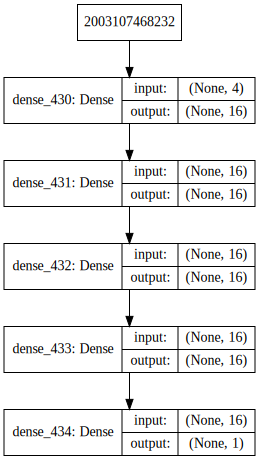

In [162]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(loaded_ANN_Best_1, show_shapes=True).create(prog='dot', format='svg'))

Outcome:

Best Model with this design only has a 78% accuracy.

Conclusion:
Exploring other Neural Network designs and models.

### Tensorflow (Coming Soon)

In [164]:
#Exploring especially for pre-built models